<h1>EXPLORATORY DATA ANALYSIS ON SUPERMART GROCERY SALES</h1>

<h3>Importing the data through a CSV</h3>

In [1]:
import csv

with open('Supermart Grocery Sales - Retail Analytics Dataset.csv') as csvfile:
    rows = csv.reader(csvfile)

    header_row = True
    data = []

    for row in rows:
        if header_row is True:
            column_names = list(row)
            header_row = False

        else:
            data.append(row)

print(len(data))

9994


<h3>Creating a Data Frame from the CSV data</h3>

In [2]:
import pandas as pd

data_frame = pd.DataFrame(data)
data_frame.columns = column_names

<h3>Getting a quick overview</h3>

In [3]:
data_frame.head()

﻿Order ID Customer Name          Category      Sub Category         City  \
0       OD1        Harish      Oil & Masala           Masalas      Vellore   
1       OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2       OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3       OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4       OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region Sales Discount  Profit       State  
0  11-08-2017  North  1254     0.12  401.28  Tamil Nadu  
1  11-08-2017  South   749     0.18   149.8  Tamil Nadu  
2  06-12-2017   West  2360     0.21   165.2  Tamil Nadu  
3  10-11-2016  South   896     0.25    89.6  Tamil Nadu  
4  10-11-2016  South  2355     0.26  918.45  Tamil Nadu

In [4]:
# Converting columns to numeric
data_frame['Sales'] = pd.to_numeric(data_frame['Sales'])
data_frame['Discount'] = pd.to_numeric(data_frame['Discount'])
data_frame['Profit'] = pd.to_numeric(data_frame['Profit'])

# Converting columns to categorical
data_frame['Category'] = pd.Categorical(data_frame['Category'])
data_frame['Sub Category'] = pd.Categorical(data_frame['Sub Category'])
data_frame['City'] = pd.Categorical(data_frame['City'])
data_frame['Region'] = pd.Categorical(data_frame['Region'])
data_frame['State'] = pd.Categorical(data_frame['State'])

data_frame.describe()

Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000

<h5>
1. The dataset has 11 columns and 9995 rows.<br>
2. All the data is from Tamil Nadu; spread across 50 Customers, 7 Categorys, 23 Sub-categories, 24 Cities, and 5 Regions.<br>
3. The average sales amount is around 1500, with a deviation of around 580.<br>
4. The average discount 22%, with a deviation of 7%.<br>
5. The average profit is approximately 375, with a standard deviation of about 240.
</h5>

<h3>
Plotting and checking the actual distribution of the Sales, Discounts, and Profits in these orders
</h3>

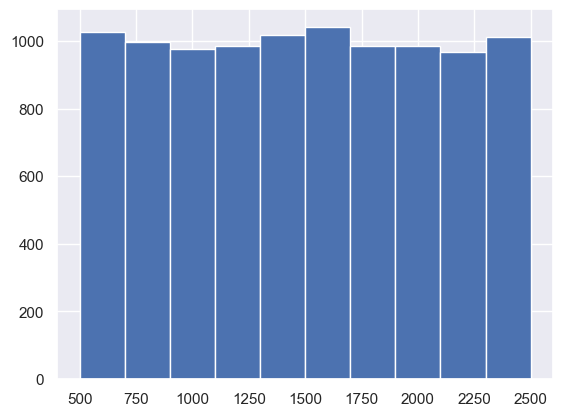

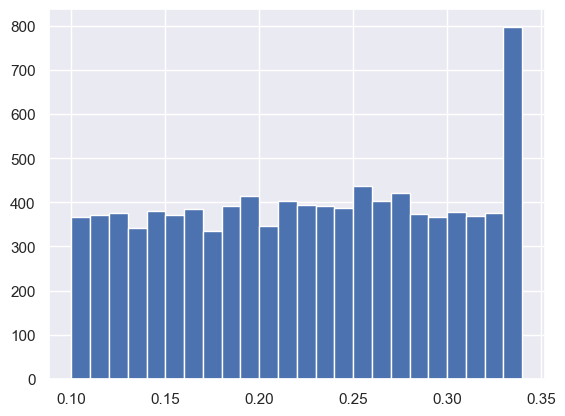

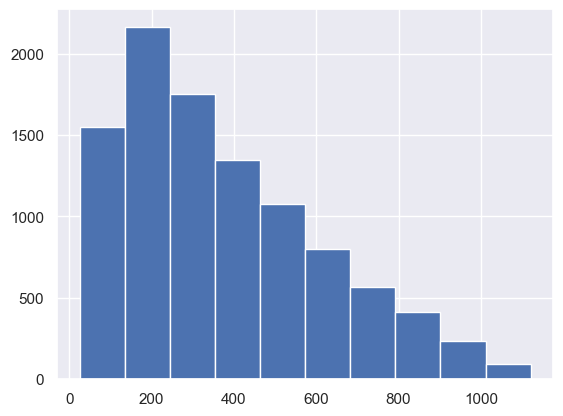

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

bins = []
for i in range(10,35,1):
    bins.append(i*0.01)
# print(bins)

sns.set_theme()
plt.hist(data_frame['Sales'])
plt.show()
plt.hist(data_frame['Discount'], bins=bins)
plt.show()
plt.hist(data_frame['Profit'])
plt.show()

<h5>
1. Overall, the Sales and Discount seem to be uniformly distributed with the various orders.<br>
2. It seems that the most popular discount is a 35% discount.<br>
3. Most of the profit comes from the transaction resulting in a profit of around 200.
</h5>

In [6]:
print("Nmber of Transactions with Discount between 0.33 and 0.34: ", int(data_frame[(data_frame['Discount']>0.33) & (data_frame['Discount']<=0.34)]['Discount'].count()))
print("Nmber of Transactions with Discount between 0.34 and 0.35: ", int(data_frame[(data_frame['Discount']>0.34) & (data_frame['Discount']<=0.35)]['Discount'].count()))
print("Nmber of Transactions with Discount between 0.35 and 0.36: ", int(data_frame[(data_frame['Discount']>0.35) & (data_frame['Discount']<=0.36)]['Discount'].count()))

Nmber of Transactions with Discount between 0.33 and 0.34:  409
Nmber of Transactions with Discount between 0.34 and 0.35:  413
Nmber of Transactions with Discount between 0.35 and 0.36:  0


<h5>
Further analyses reveals, the tall bar for the last bin is an error.
</h5>

<h3>
Time Series Analysis
</h3>

In [7]:
# Correcting the inconsistency of strings in the Order Date
order_dates = pd.Series(data_frame['Order Date'])
new_order_dates = order_dates.str.extract(r'([0-9]+)[-/]([0-9]+)[-/]([0-9]+)')
data_frame['Order Date'] = new_order_dates[0] + '-' + new_order_dates[1] + '-' + new_order_dates[2]
data_frame['Order Date'] = pd.to_datetime(data_frame['Order Date'], format='%m-%d-%Y')

In [8]:
# Sorting by increasing Order Dates
data_frame.sort_values(by='Order Date')
data_frame.head()

﻿Order ID Customer Name          Category      Sub Category         City  \
0       OD1        Harish      Oil & Masala           Masalas      Vellore   
1       OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2       OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3       OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4       OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  
0 2017-11-08  North   1254      0.12  401.28  Tamil Nadu  
1 2017-11-08  South    749      0.18  149.80  Tamil Nadu  
2 2017-06-12   West   2360      0.21  165.20  Tamil Nadu  
3 2016-10-11  South    896      0.25   89.60  Tamil Nadu  
4 2016-10-11  South   2355      0.26  918.45  Tamil Nadu

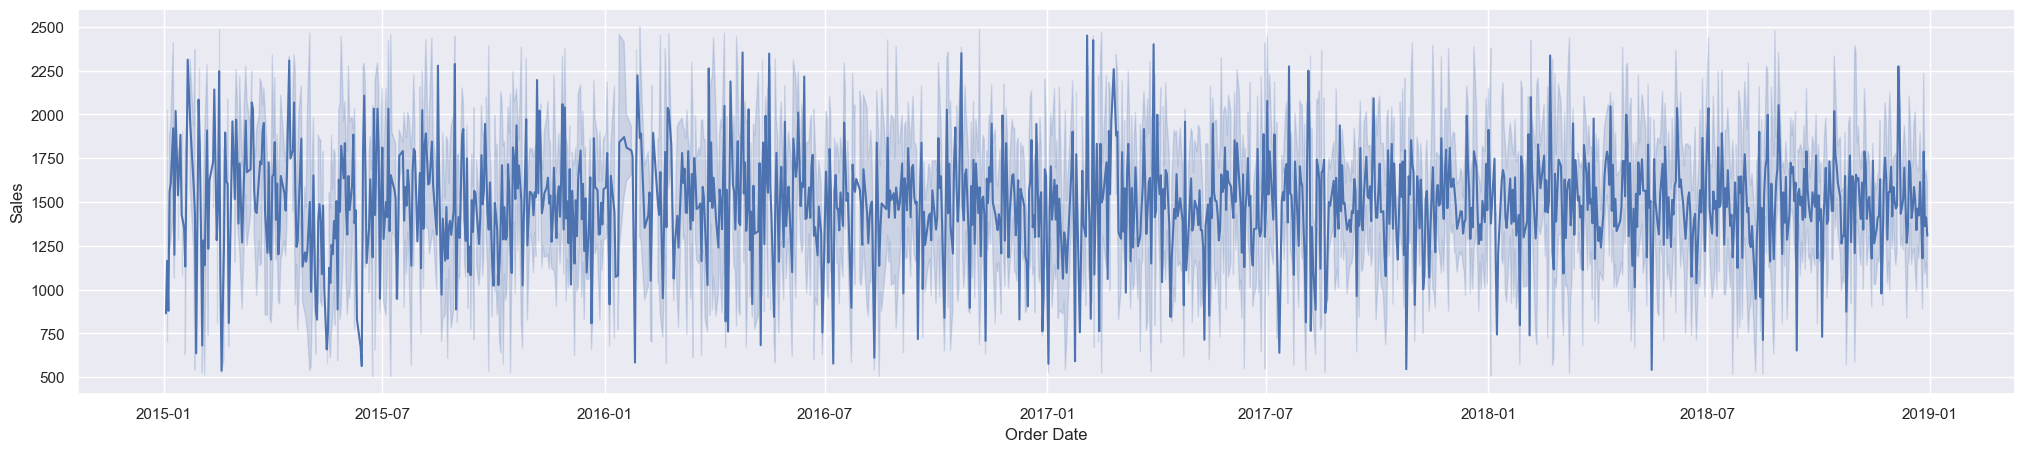

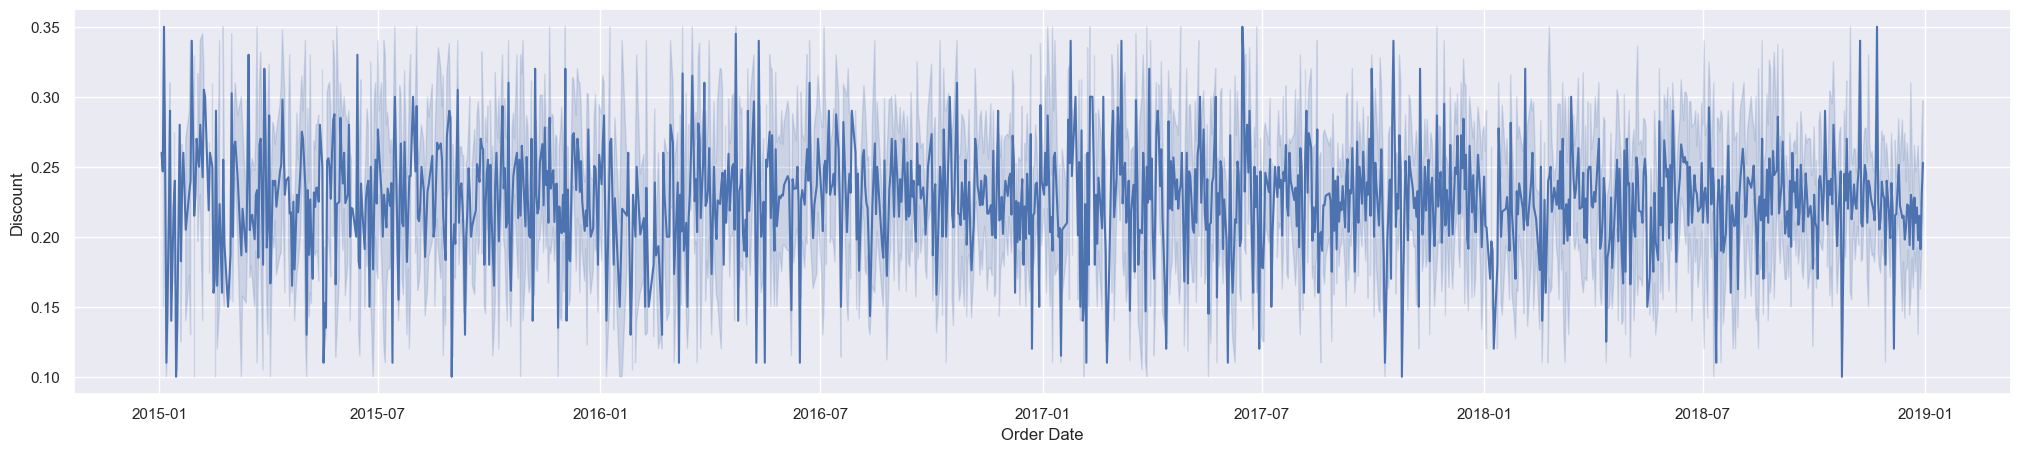

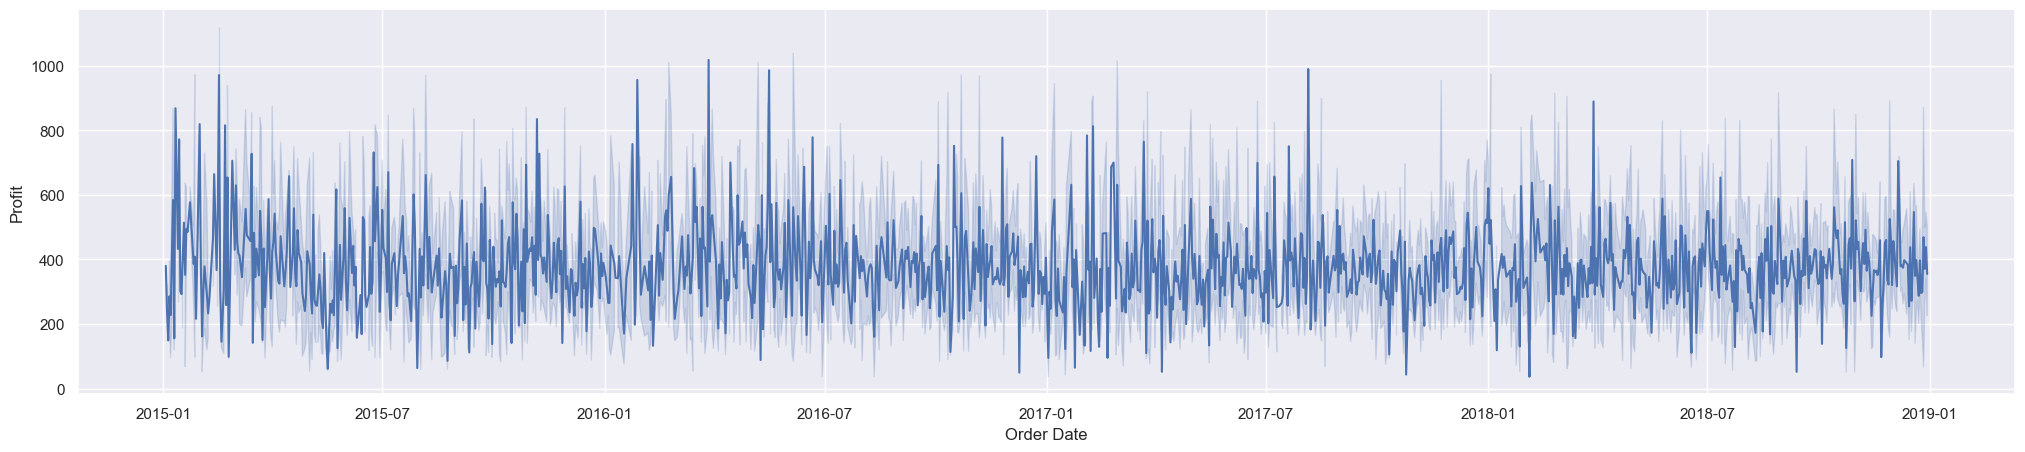

In [9]:
sns.set_theme(rc={'figure.figsize':(25,5)})
sns.set_style("darkgrid")
ax = sns.lineplot(data = data_frame, x=data_frame['Order Date'], y=data_frame['Sales'])
plt.show()
ax = sns.lineplot(data = data_frame, x=data_frame['Order Date'], y=data_frame['Discount'])
plt.show()
ax = sns.lineplot(data = data_frame, x=data_frame['Order Date'], y=data_frame['Profit'])
plt.show()

<h5>
Sales, Discount and Price do not seem to posses any temporal dependancy. Real life data usually has certain seasonalities and trends. This is clearly a uniformly random generation of data points.

<h2> Bi-Variate Analysis
</h2>

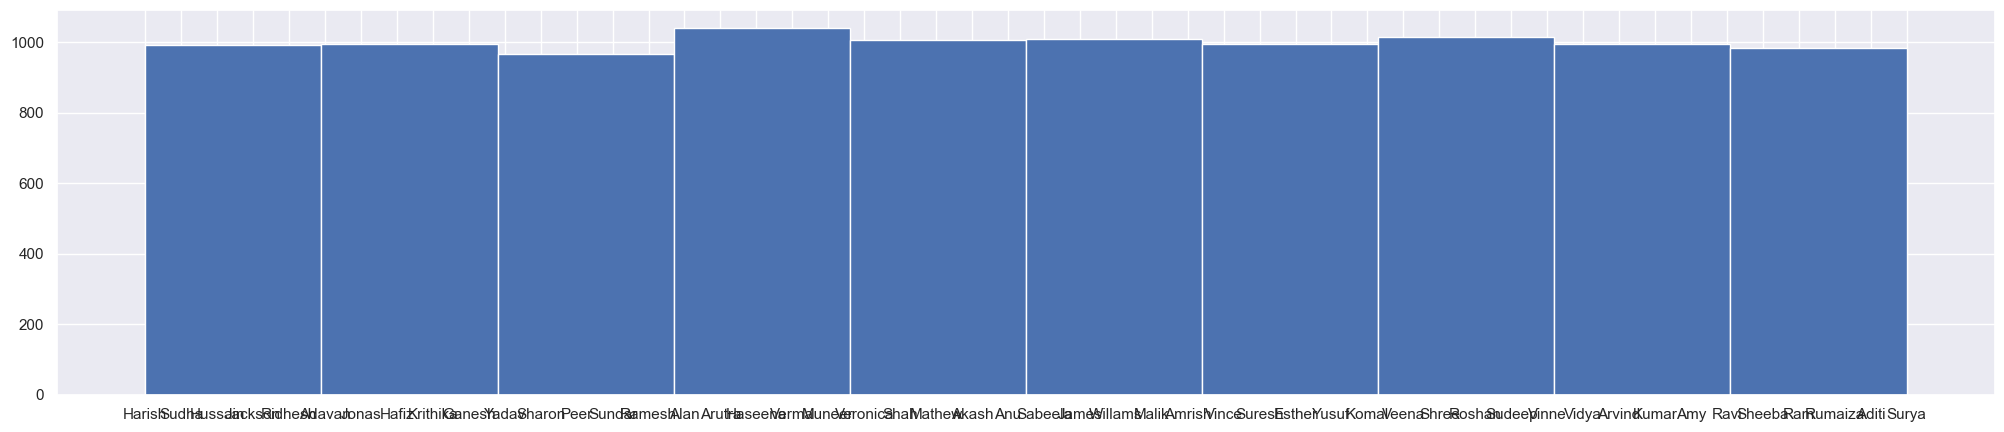

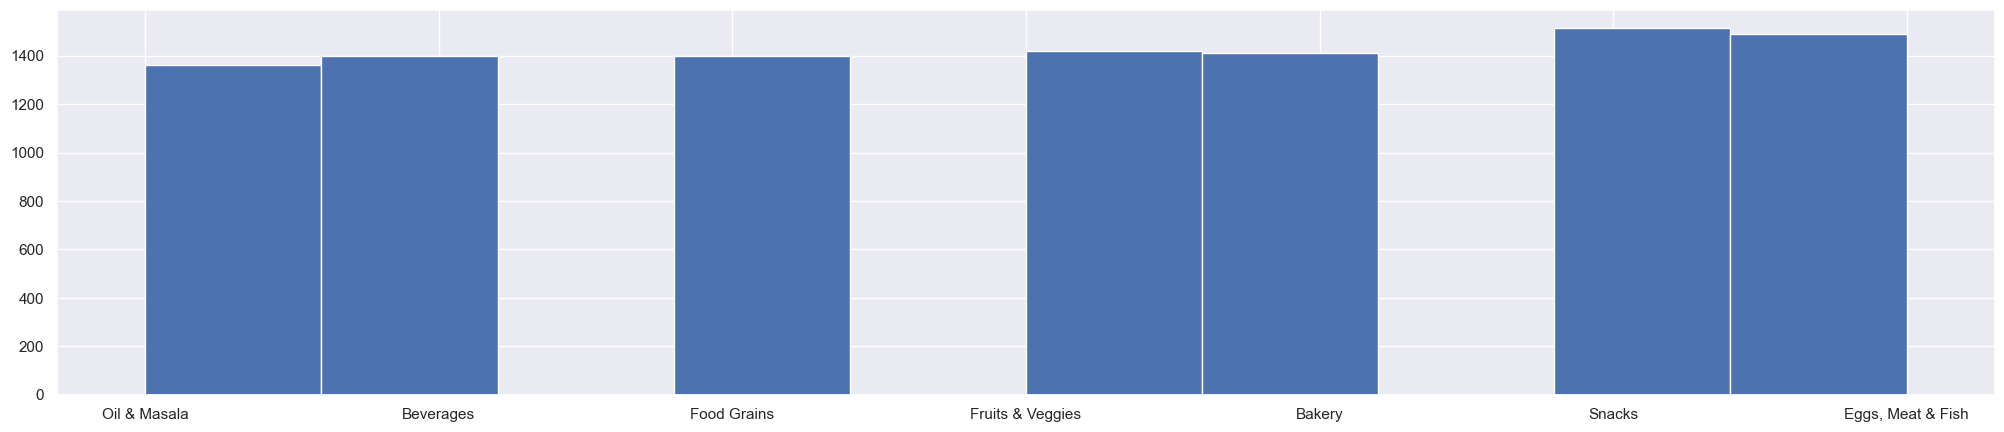

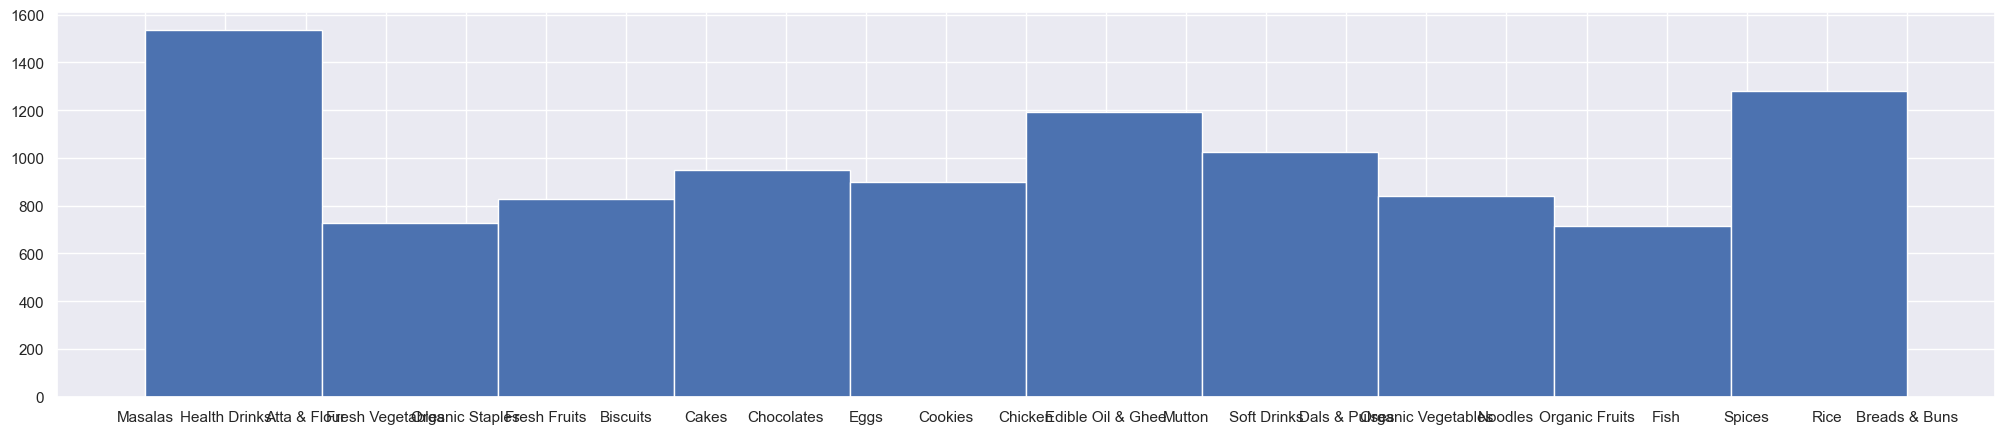

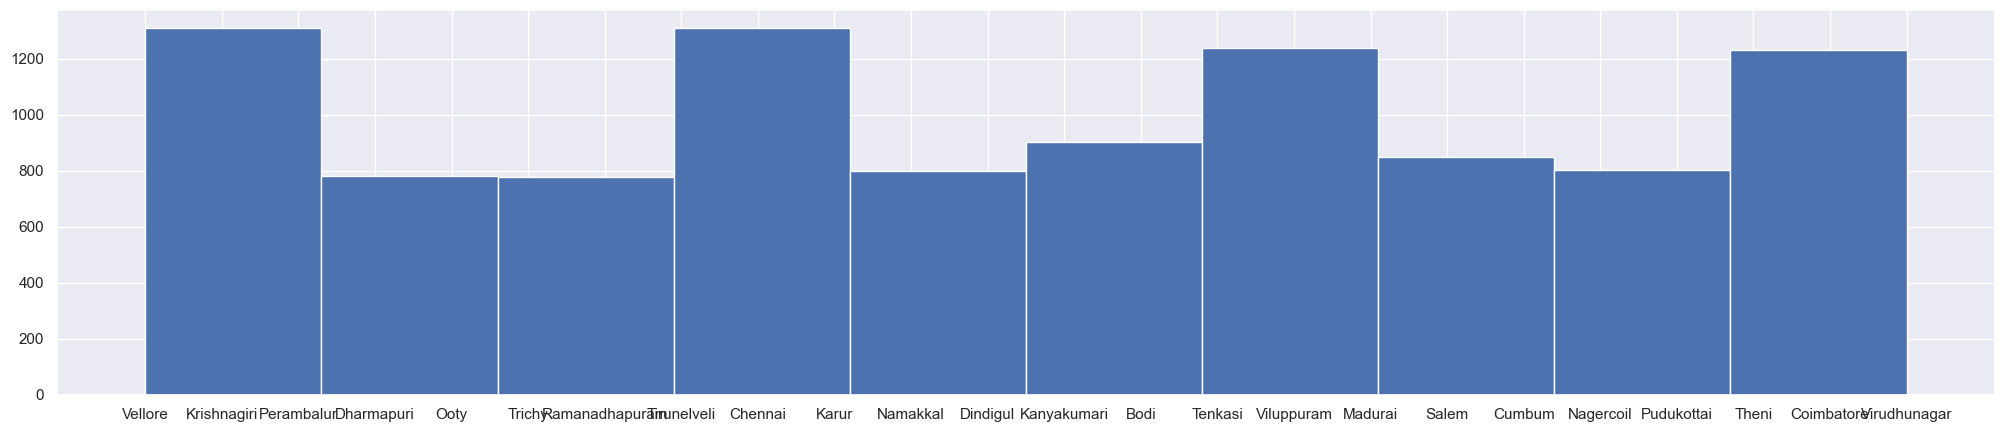

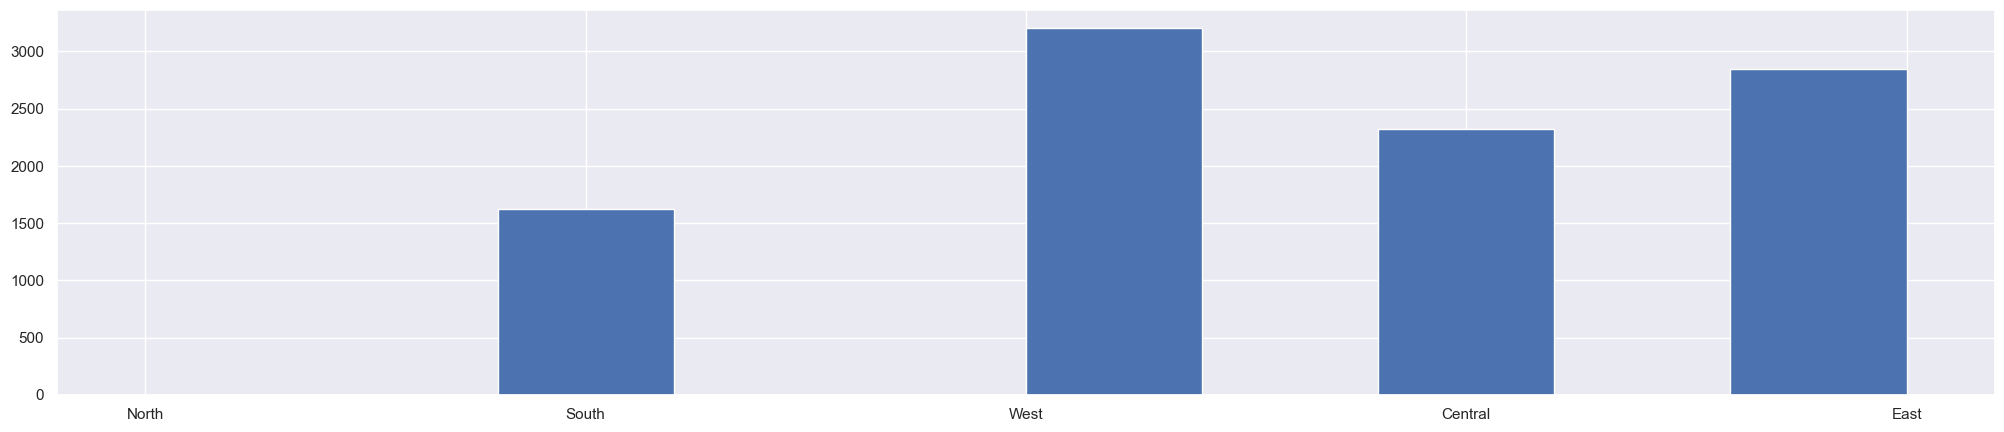

In [10]:
sns.set_theme()
plt.hist(data_frame['Customer Name'])
plt.show()
plt.hist(data_frame['Category'])
plt.show()
plt.hist(data_frame['Sub Category'])
plt.show()
plt.hist(data_frame['City'])
plt.show()
plt.hist(data_frame['Region'])
plt.show()

In [57]:
# Defining a function for a scatter plot with density-based hue
from scipy import stats

def density_scatter_plot(x_axis=None, y_axis = None, data=None):
    if x_axis is None or y_axis is None or data is None:
        print('DEFINE X_AXIS, Y_AXIS, AND DATA!')
        return
    
    sns.set_theme(rc={'figure.figsize':(5,5)})

    values = np.vstack([data[x_axis], data[y_axis]])
    kernel = stats.gaussian_kde(values)(values)
    fig, ax = plt.subplots(figsize=(6, 6))

    sns.scatterplot(data=data, x=x_axis, y=y_axis, c=kernel, cmap="viridis", ax=ax)
    plt.show()

<h3>
PROFIT
</h3>

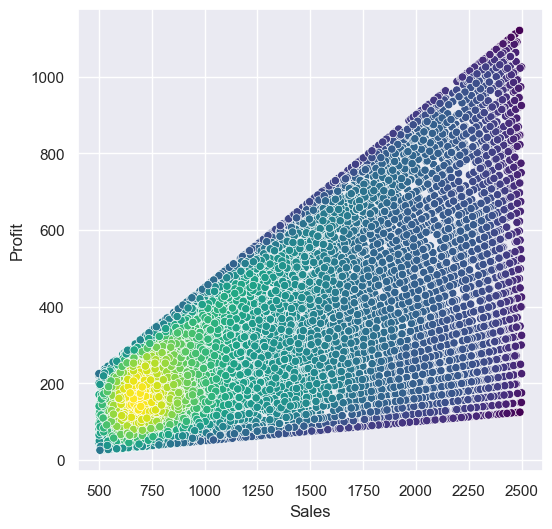

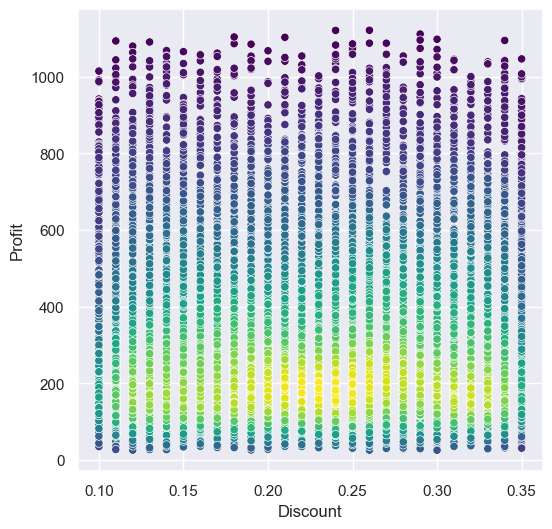

In [59]:

numeric_cols = data_frame.select_dtypes(include='number').columns[:-1]

for x_axis in numeric_cols:
    density_scatter_plot(x_axis=x_axis, y_axis = 'Profit', data=data_frame)

1. Higher Sales transactions yield higher Profit.
2. The percentage of discount in transactions does not significantly affect the profit yield.
3. Most transactions have a sales amount of 650, and a profit of around 150.
4. Low profit% transactions are as likely as High profit% transactions. [profit% = (profit/sales)*100]

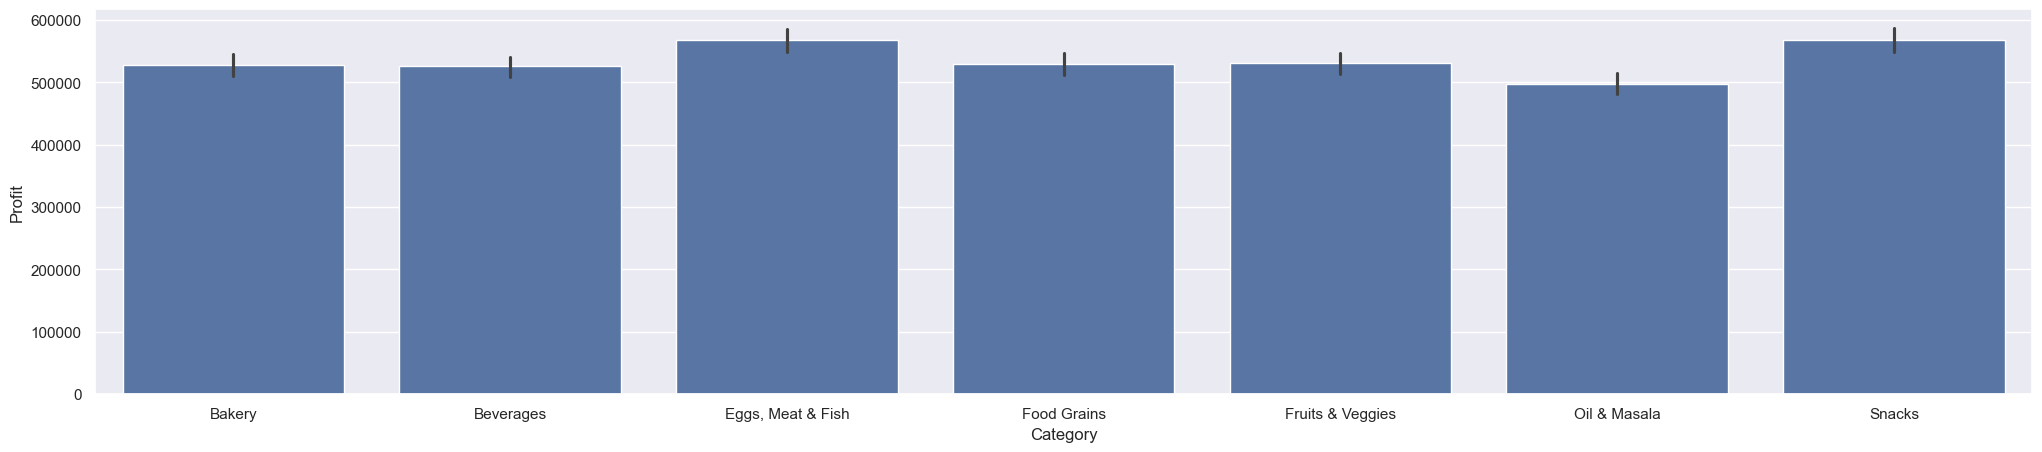

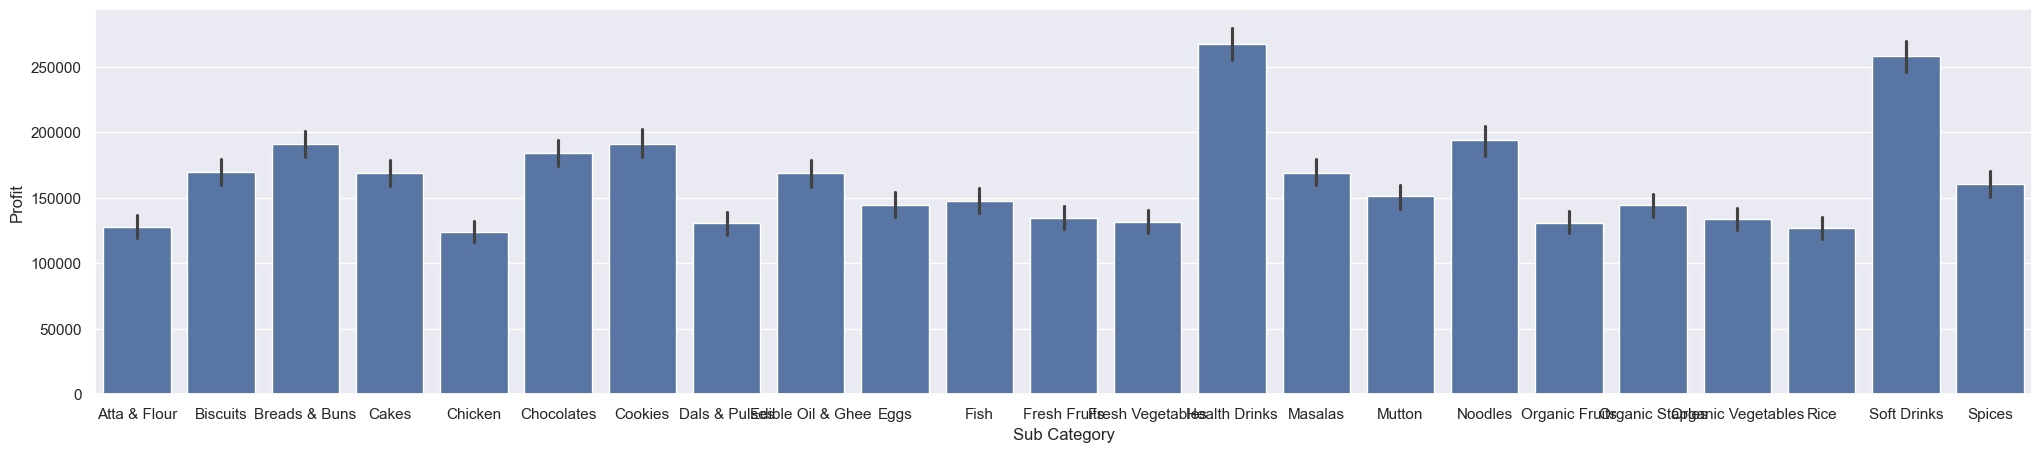

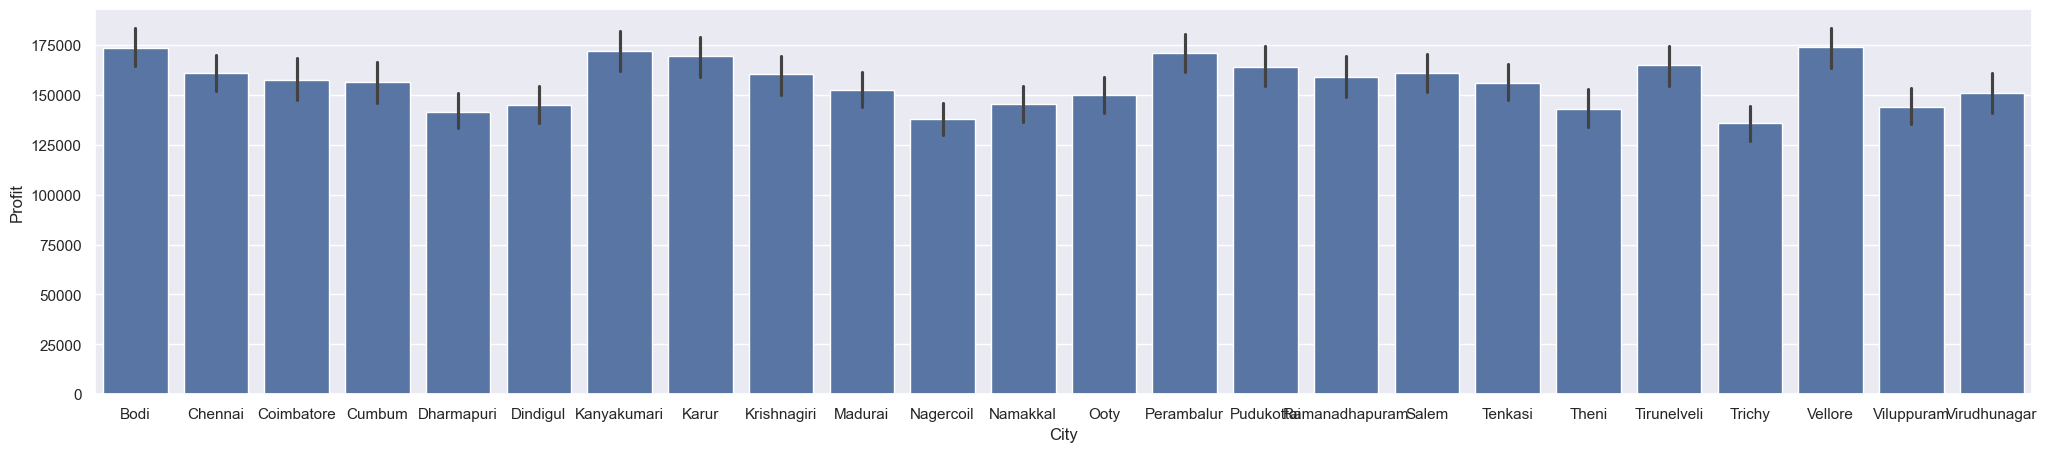

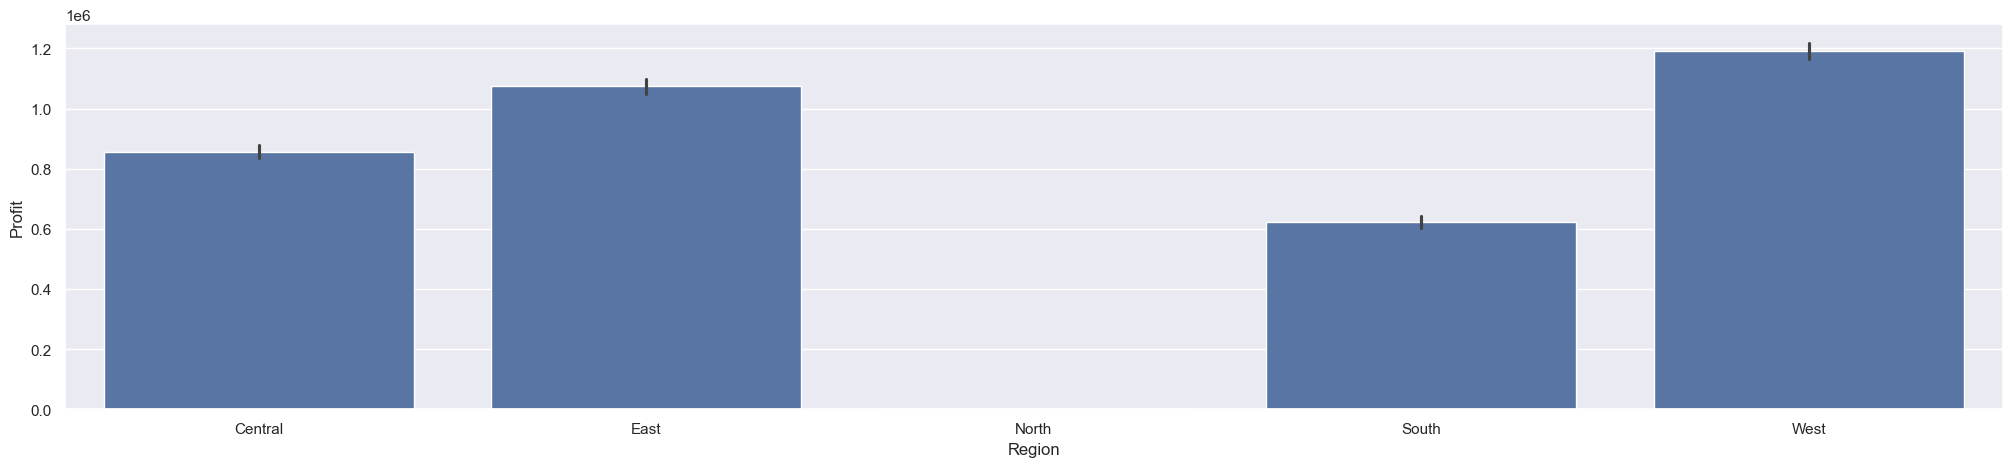

In [62]:
sns.set_theme(rc={'figure.figsize':(25,5)})
x_axes = ['Category','Sub Category', 'City', 'Region']

for x_axis in x_axes:
    sns.barplot(data_frame,x=data_frame[x_axis], y=data_frame['Profit'], estimator='sum')
    plt.show()

1. Approximately the same profit is earned across all categories
2. Health drinks and Sports drinks are responsible for the highest profit
3. Dharmapuri, Nagercoil, and Trichy are the lowest profit producing cities
4. There seems to be 0 sales in the North region (Missing data?, no stores?)
5. West region seems to be the most profitable, while the south seems the least profitable.

<h3>
DISCOUNT
</h3>

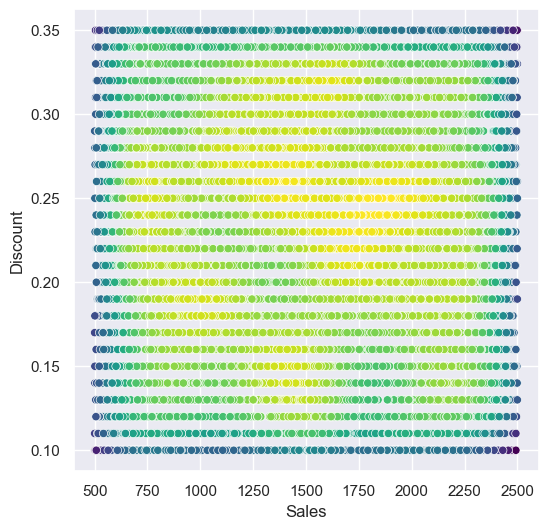

In [60]:
density_scatter_plot(x_axis='Sales', y_axis = 'Discount', data=data_frame)

Discount and Sales have no significant correlation

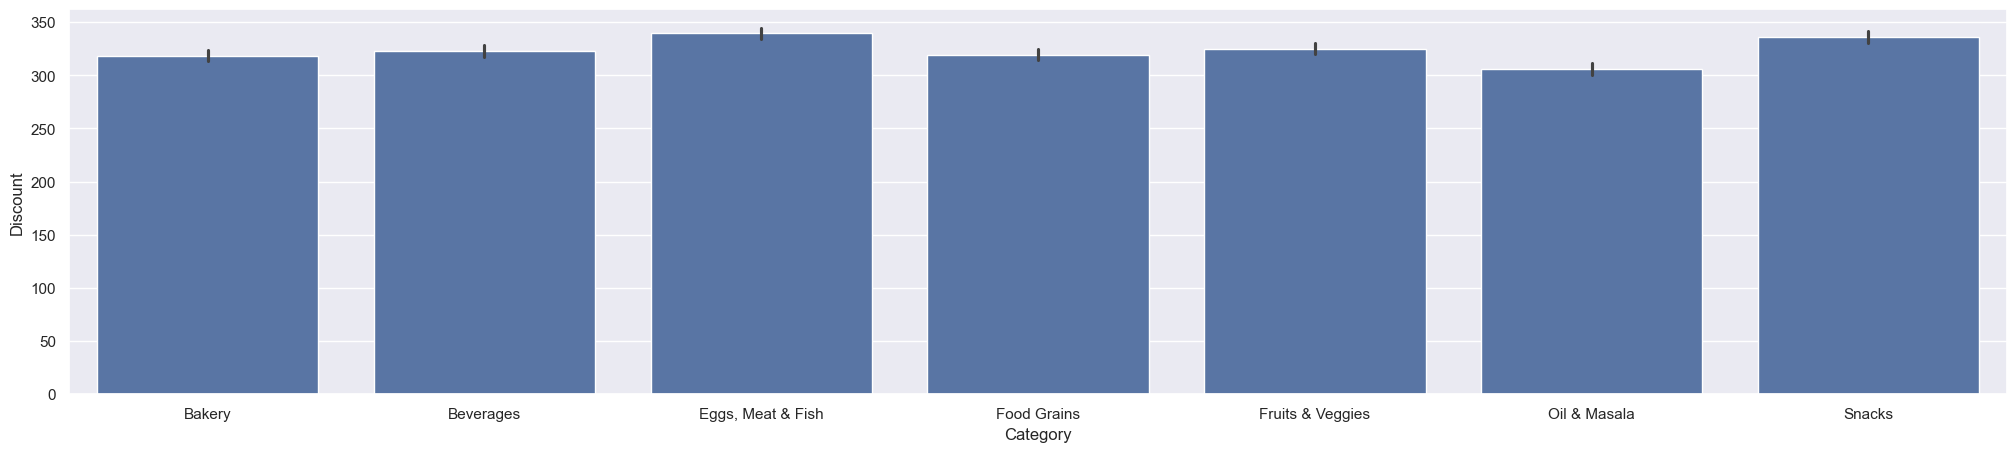

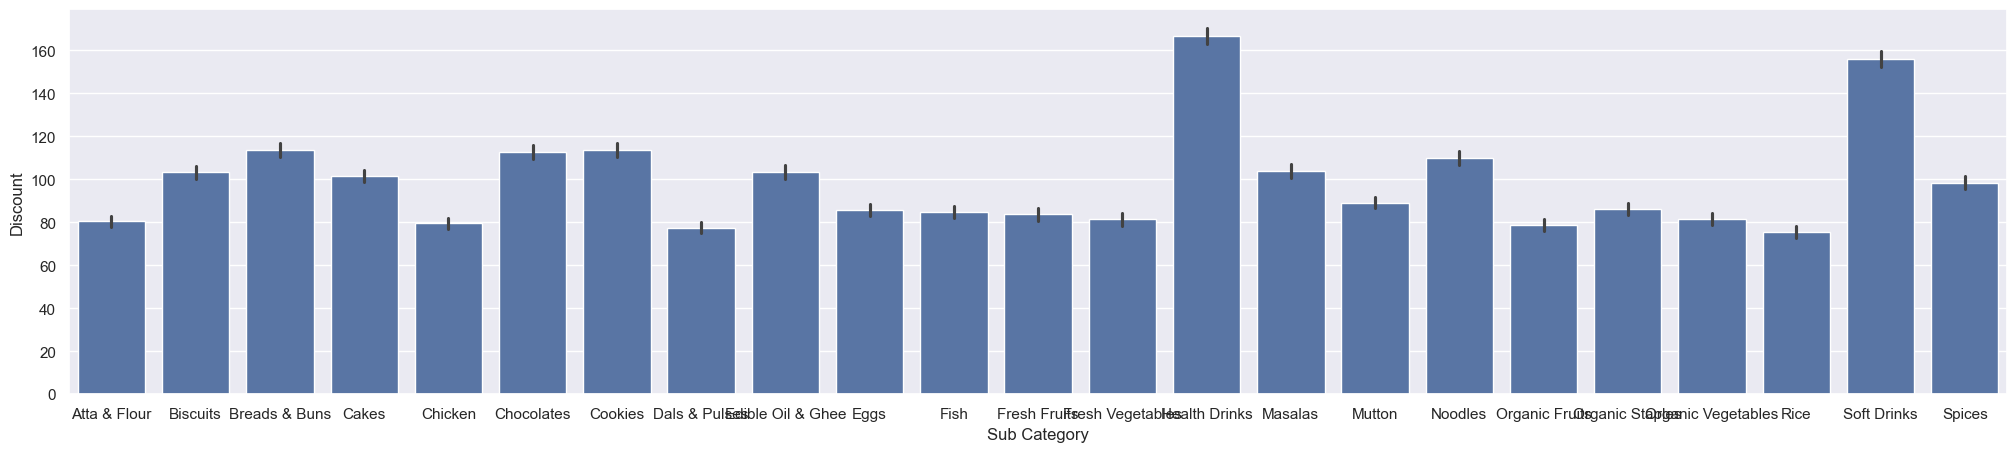

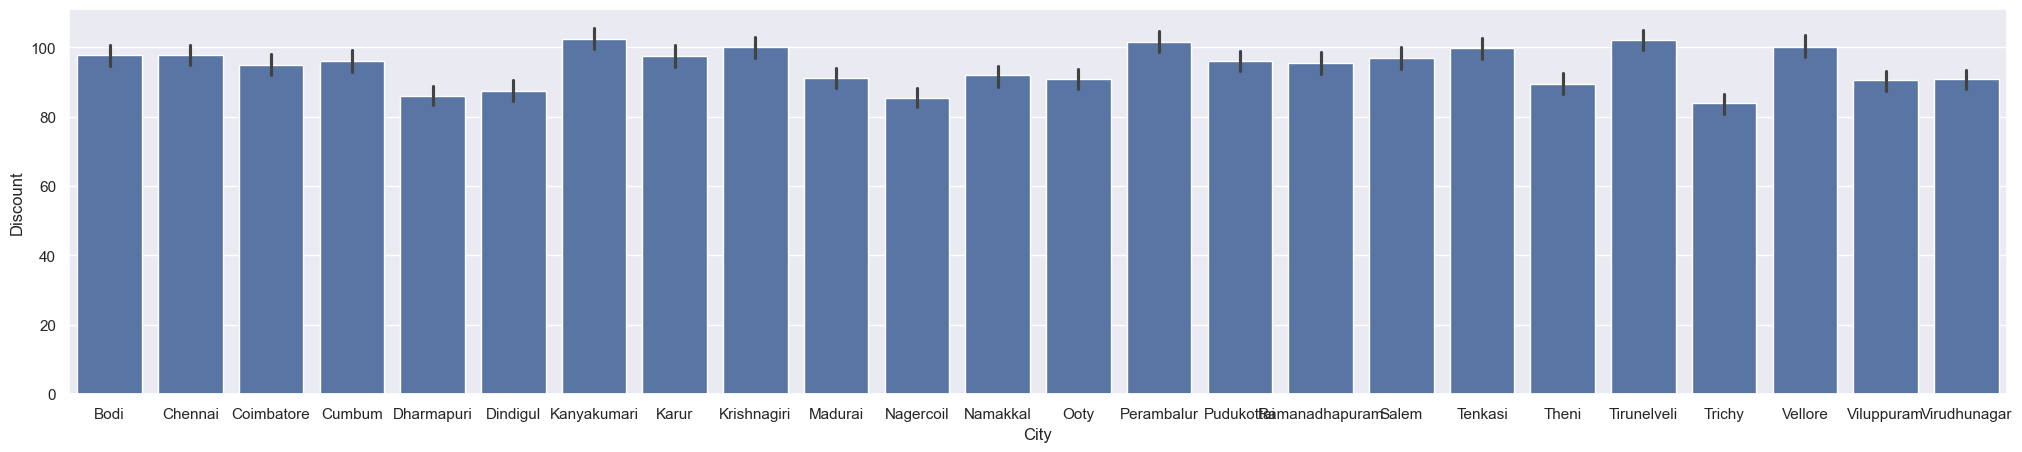

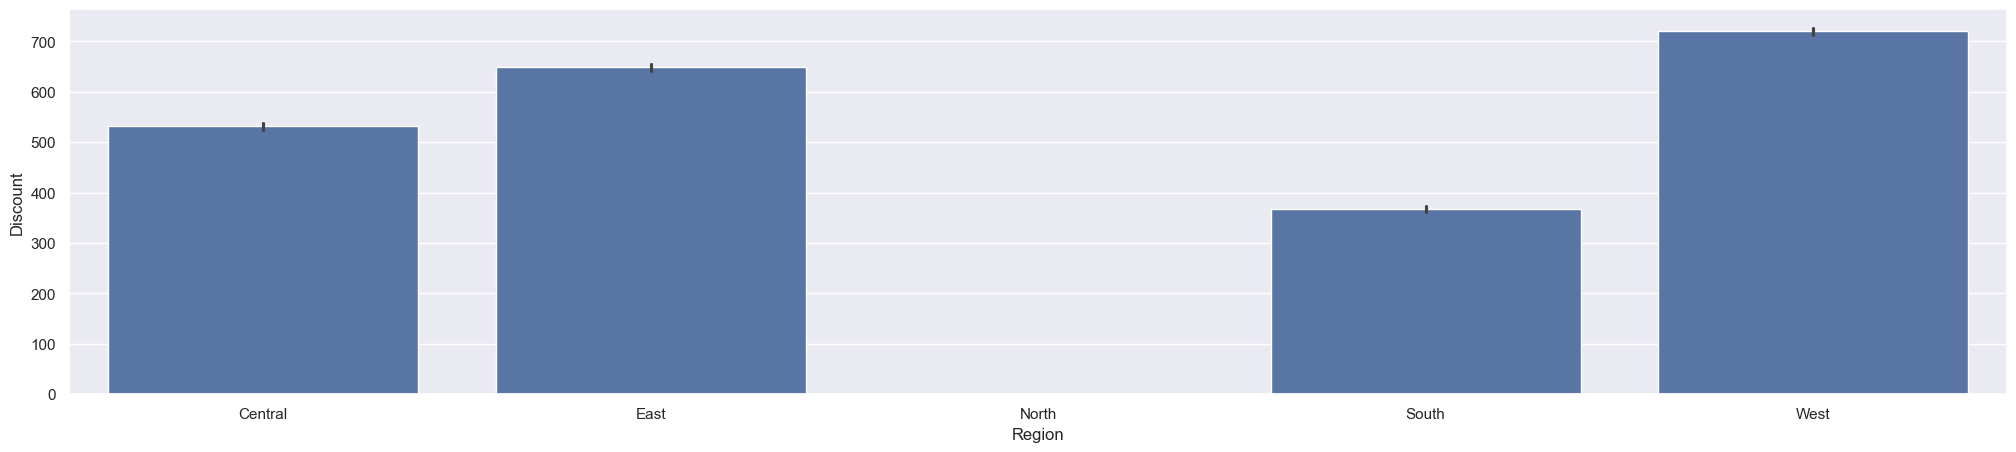

In [63]:
sns.set_theme(rc={'figure.figsize':(25,5)})
x_axes = ['Category','Sub Category', 'City', 'Region']

for x_axis in x_axes:
    sns.barplot(data_frame,x=data_frame[x_axis], y=data_frame['Discount'], estimator='sum')
    plt.show()

The relations between the Discount of the transactions and the categories, subcategories, city, and region, are identical to the relations of Profit with the before-mentioned properties.

<h3>
SALES
</h3>

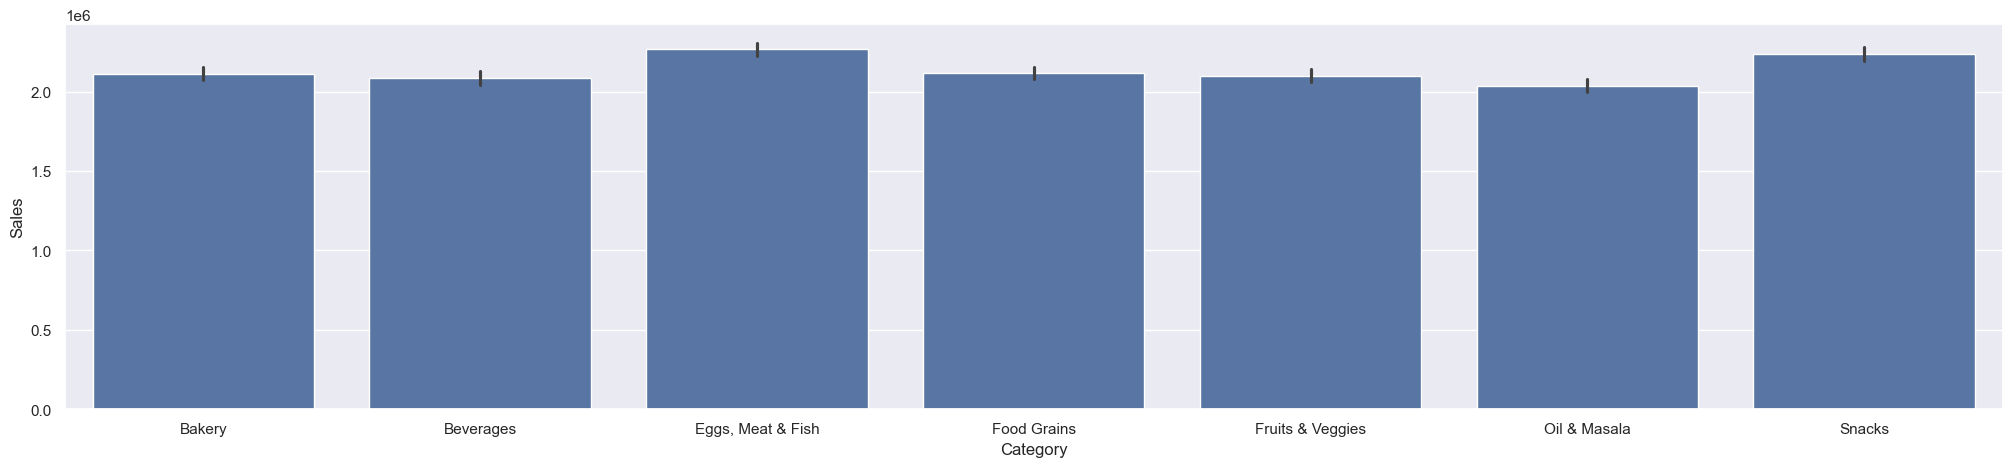

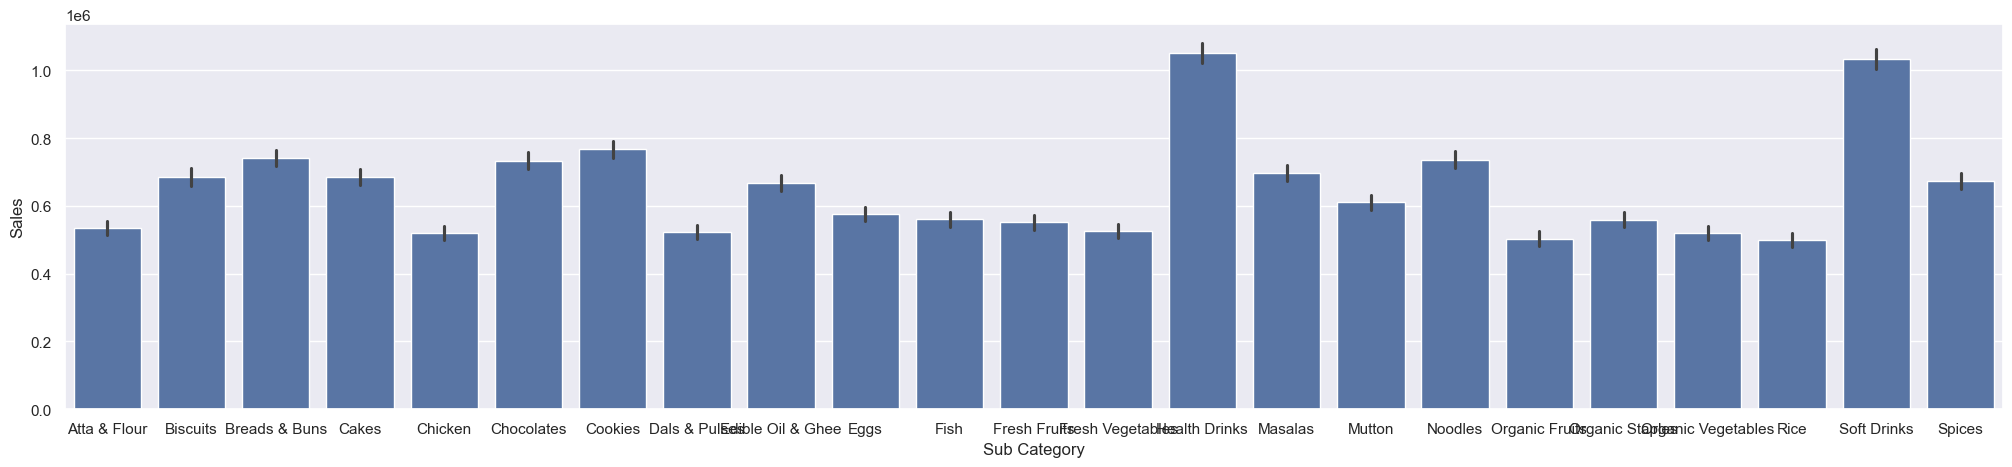

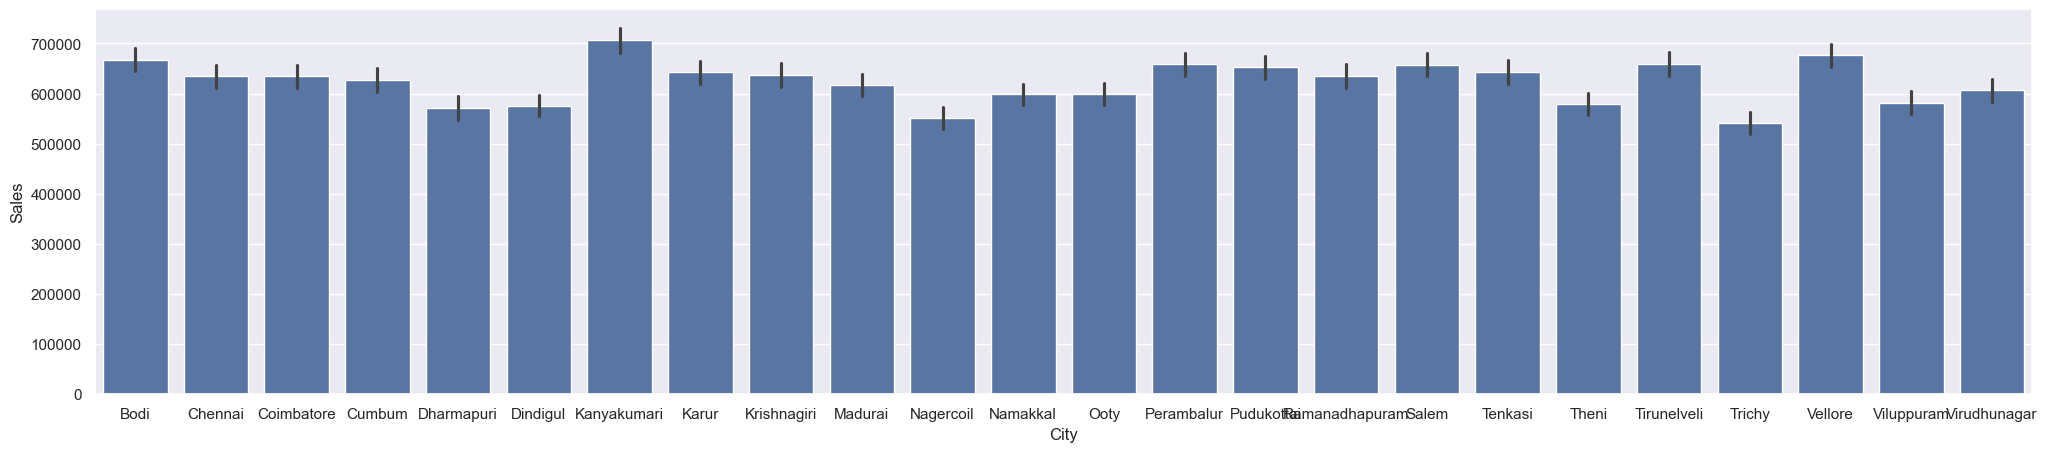

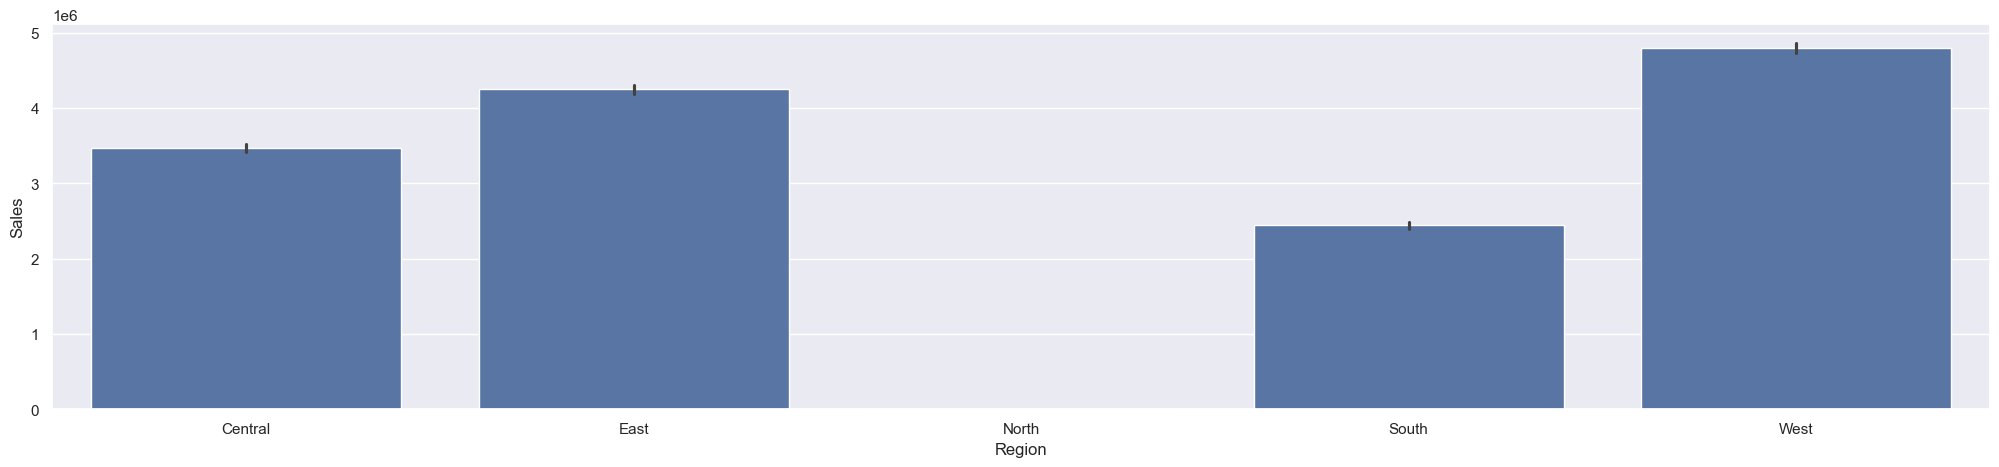

In [64]:
sns.set_theme(rc={'figure.figsize':(25,5)})
x_axes = ['Category','Sub Category', 'City', 'Region']

for x_axis in x_axes:
    sns.barplot(data_frame,x=data_frame[x_axis], y=data_frame['Sales'], estimator='sum')
    plt.show()

The relations between the Sales of the transactions and the categories, subcategories, city, and region, are identical to the relations of Profit and Discount with the before-mentioned properties.

<h2> Tri-variate Analysis
</h2>

<h3> City-Wise study
</h3>

1. Does profit depend on (plot graph X vs Y, calculate correlation with it):
    a. sales
    b. discount
    c. category
    d. subcartegory
    e. city
    f. region

2. Does discount depend on:
    a. Customer
    b. Category
    c. subcategory
    d. city
    e. region
    f. sales

3. Does a particular city and a category correlate with profit? (trivariate analysis)



4. Feature Engineering.. (Seasons)

5. Make up questions on the data.

Leet Code
Omdena - 40%
EDA project - 40%
Applying - 10%
Newton - 10%
 
Apply to companies daily (Linkdein search and other clever methods)


DATA FOR CITY  Vellore
############### PROFIT 


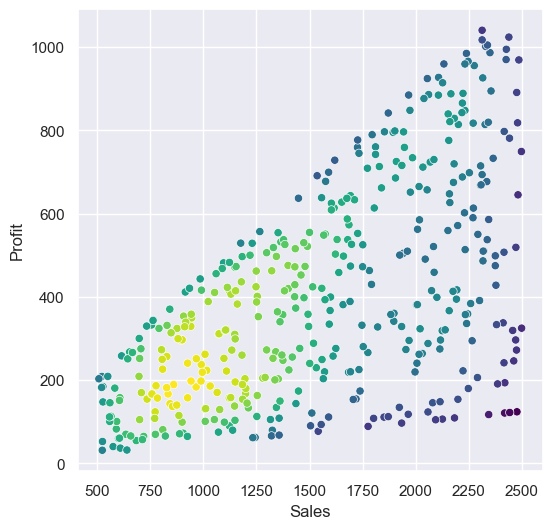

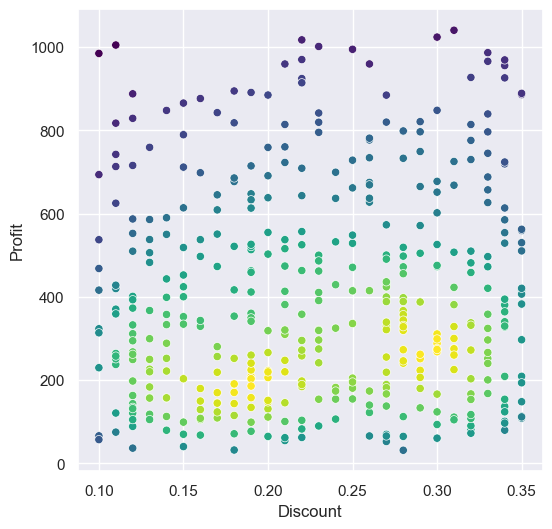

DATA FOR CITY  Krishnagiri
############### PROFIT 


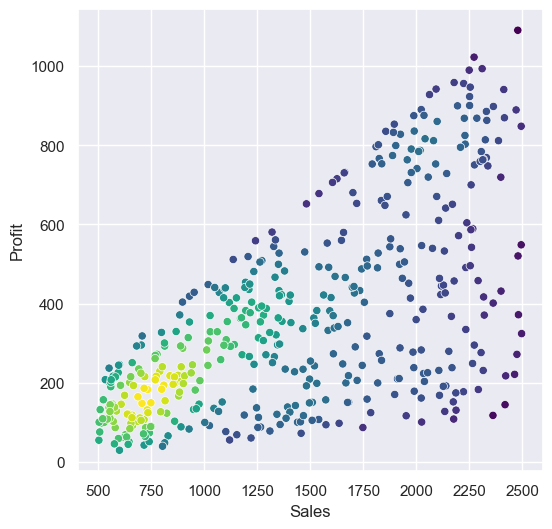

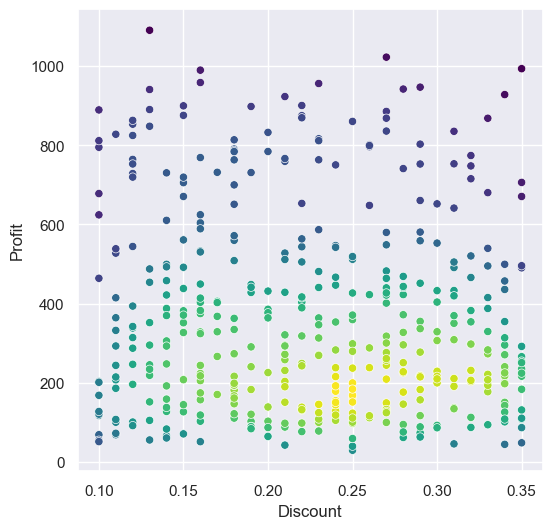

DATA FOR CITY  Perambalur
############### PROFIT 


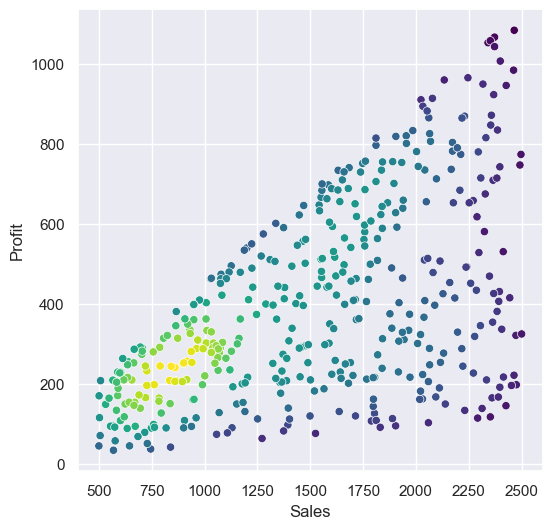

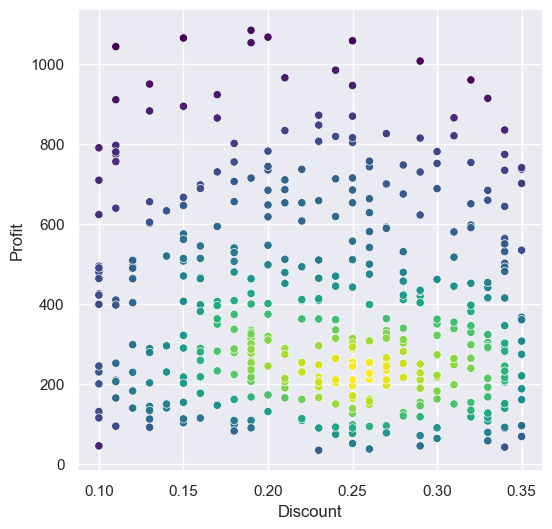

DATA FOR CITY  Dharmapuri
############### PROFIT 


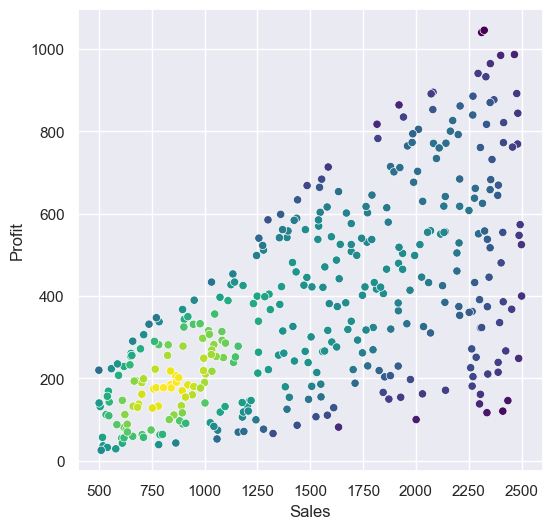

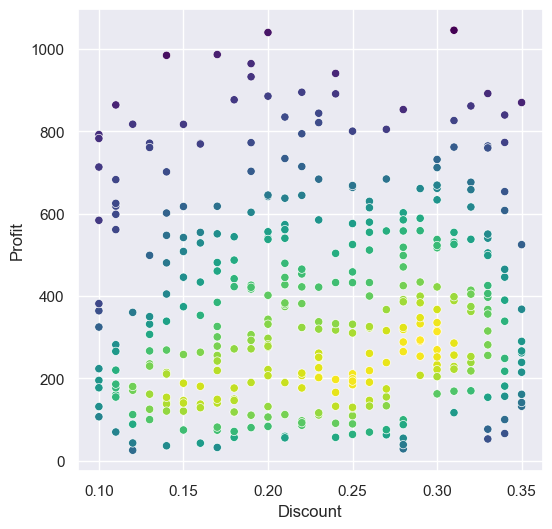

DATA FOR CITY  Ooty
############### PROFIT 


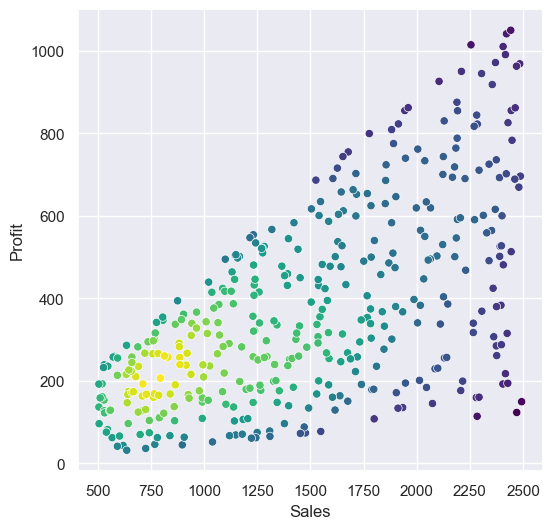

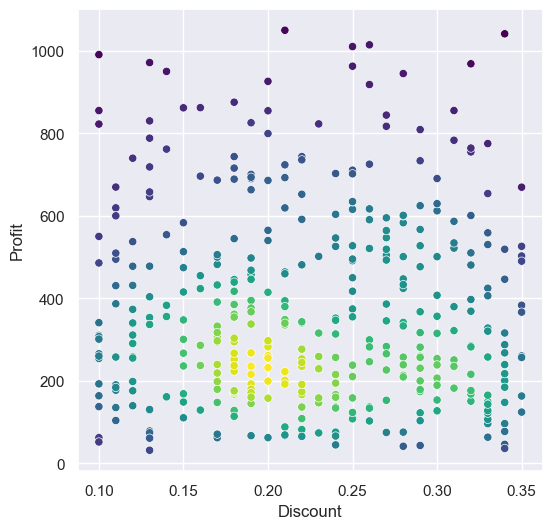

DATA FOR CITY  Trichy
############### PROFIT 


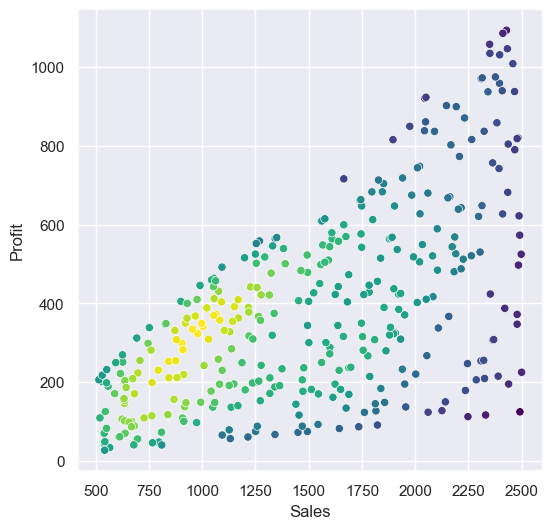

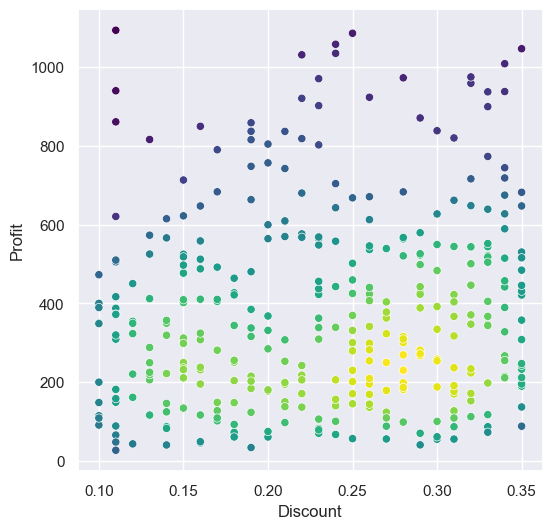

DATA FOR CITY  Ramanadhapuram
############### PROFIT 


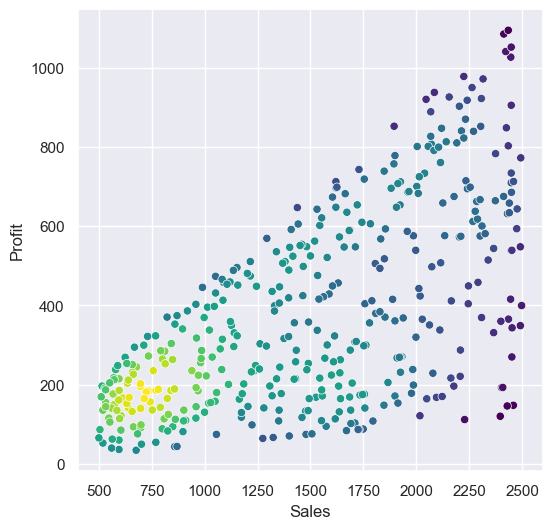

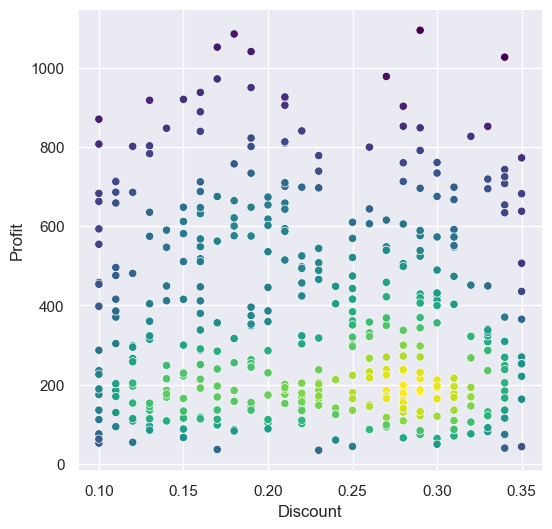

DATA FOR CITY  Tirunelveli
############### PROFIT 


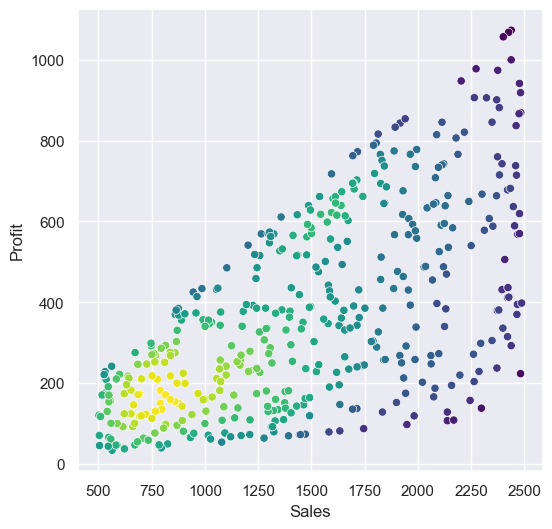

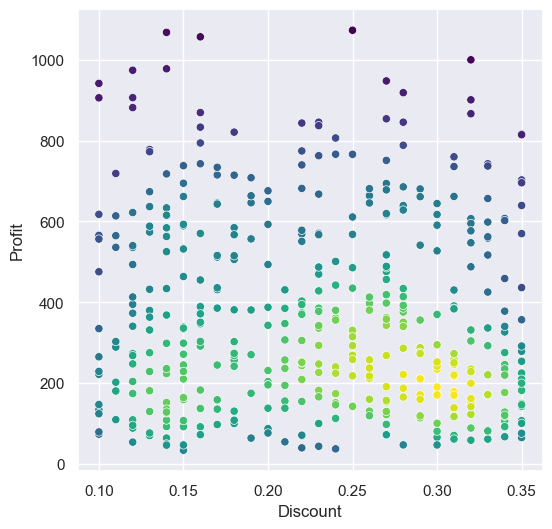

DATA FOR CITY  Chennai
############### PROFIT 


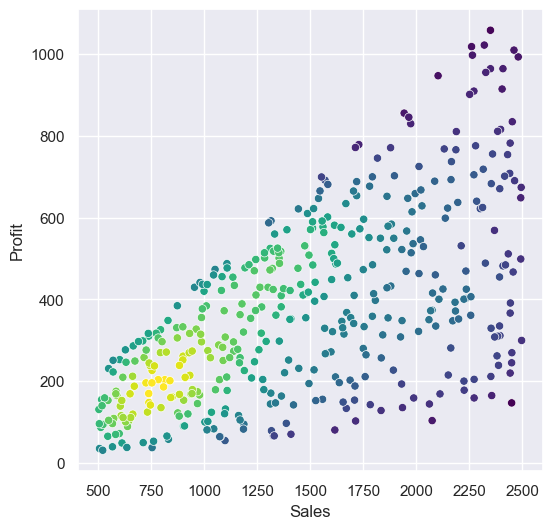

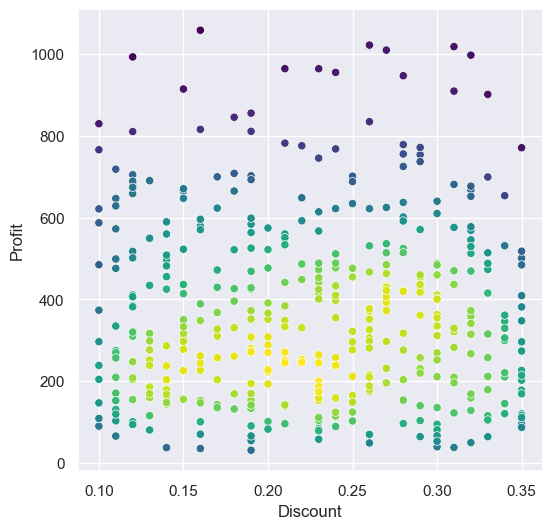

DATA FOR CITY  Karur
############### PROFIT 


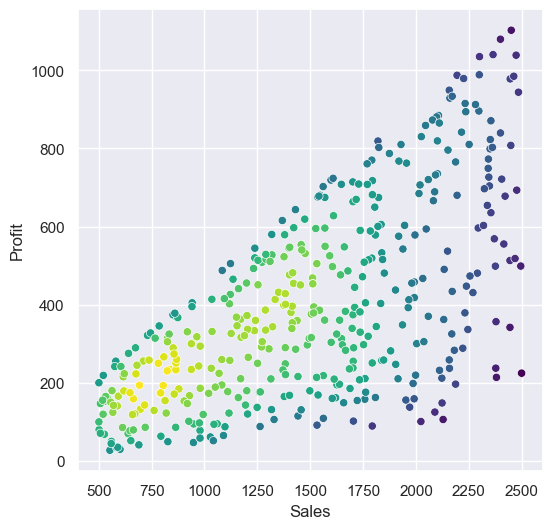

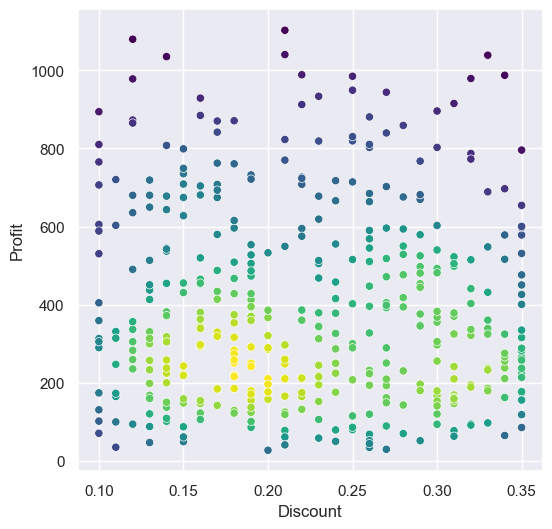

DATA FOR CITY  Namakkal
############### PROFIT 


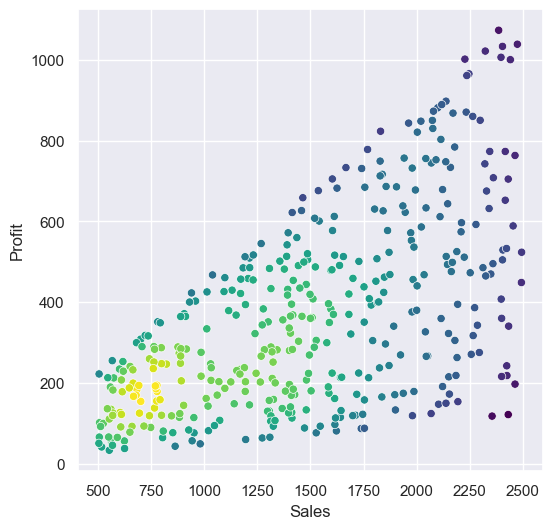

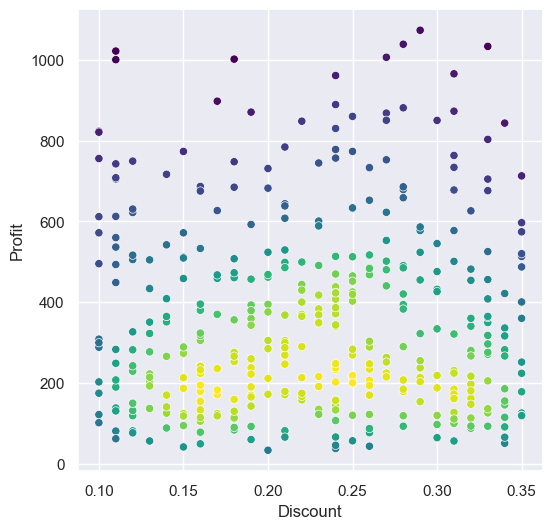

DATA FOR CITY  Dindigul
############### PROFIT 


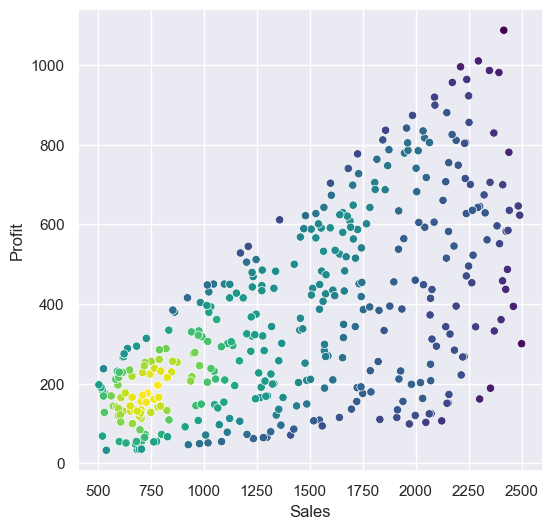

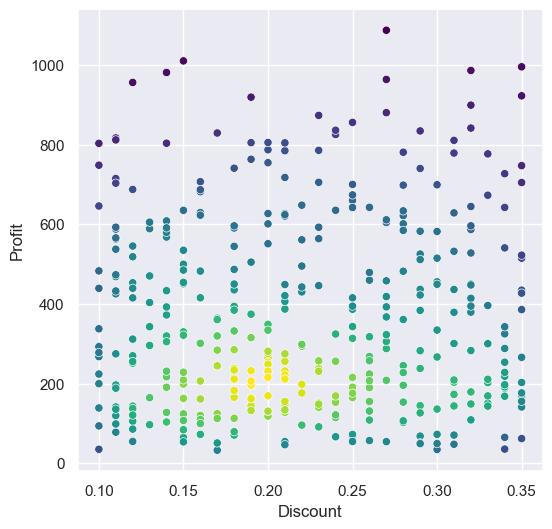

DATA FOR CITY  Kanyakumari
############### PROFIT 


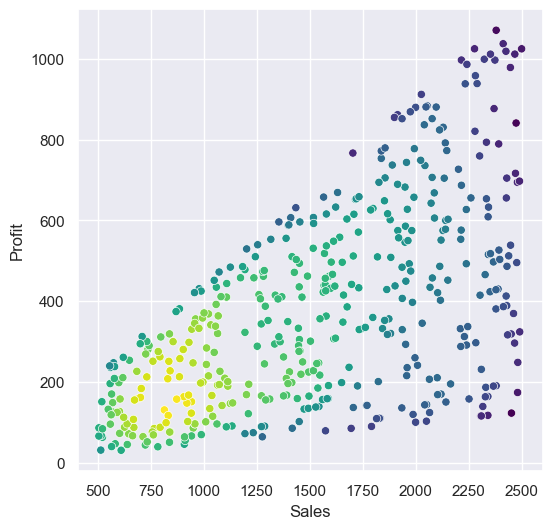

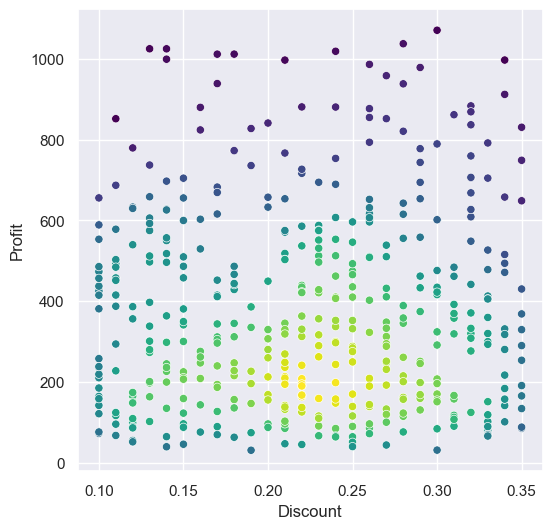

DATA FOR CITY  Bodi
############### PROFIT 


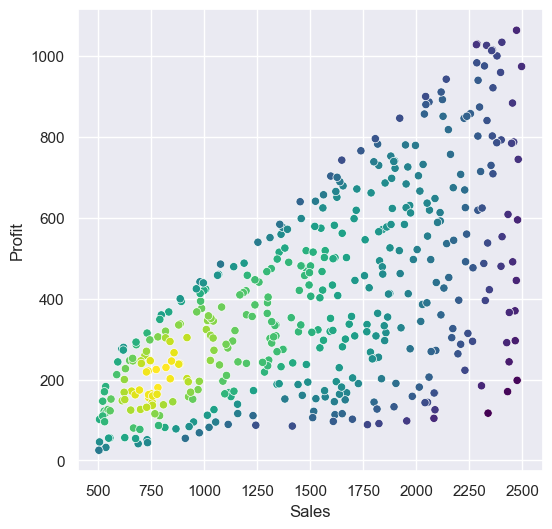

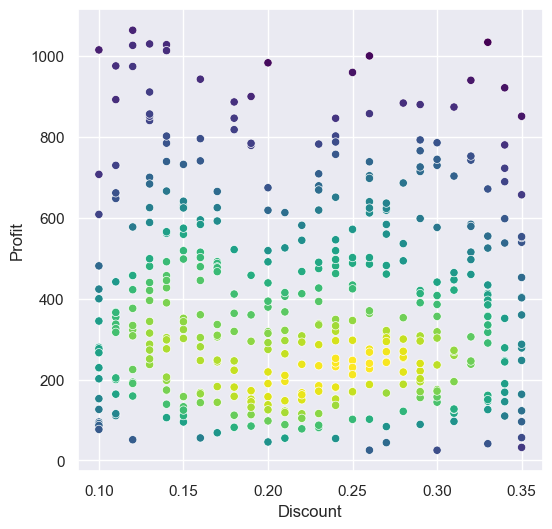

DATA FOR CITY  Tenkasi
############### PROFIT 


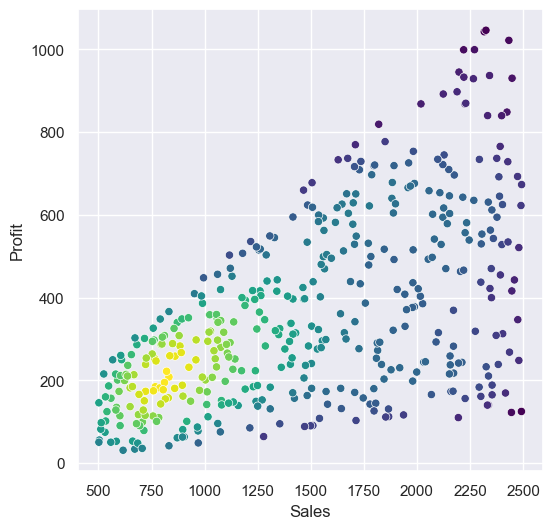

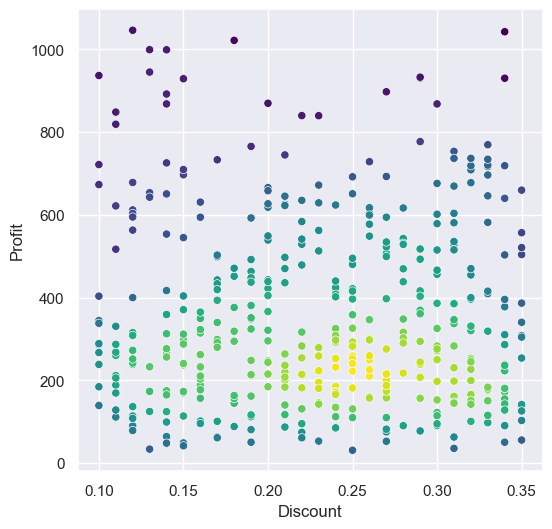

DATA FOR CITY  Viluppuram
############### PROFIT 


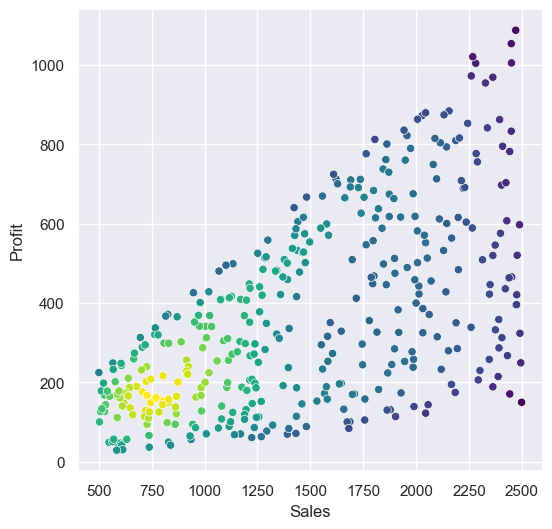

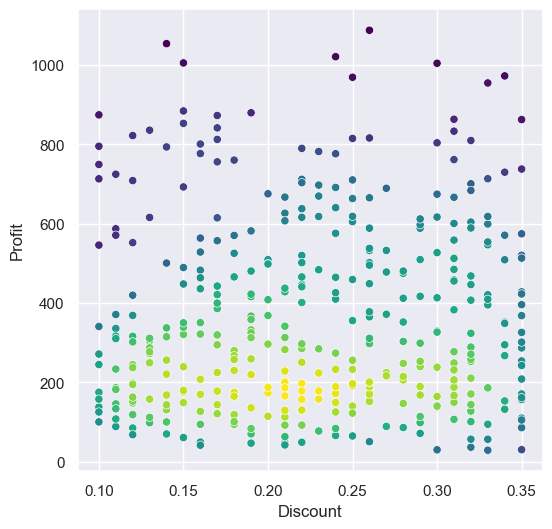

DATA FOR CITY  Madurai
############### PROFIT 


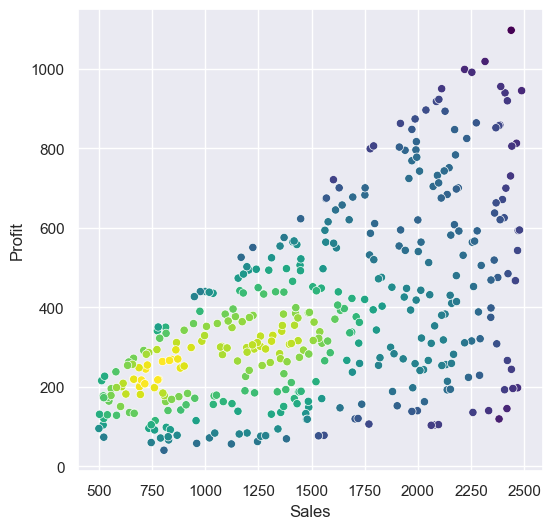

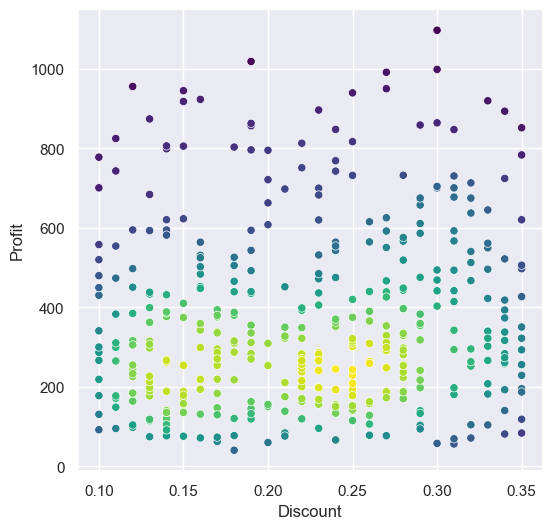

DATA FOR CITY  Salem
############### PROFIT 


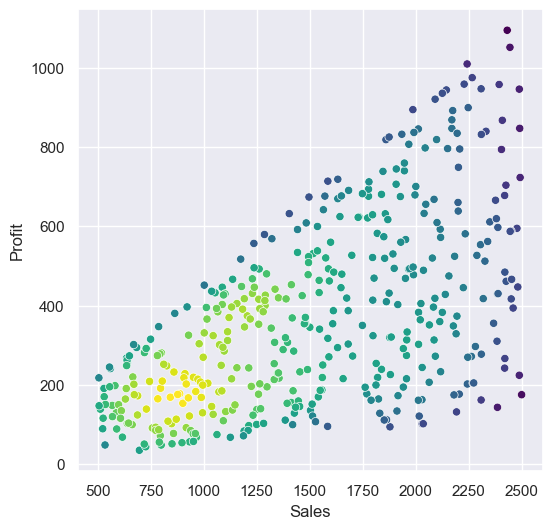

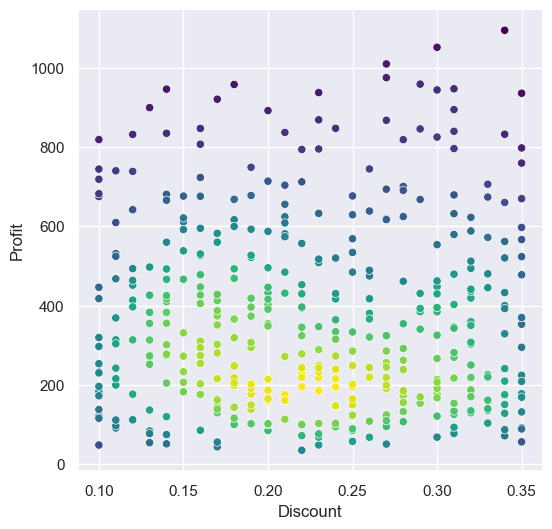

DATA FOR CITY  Cumbum
############### PROFIT 


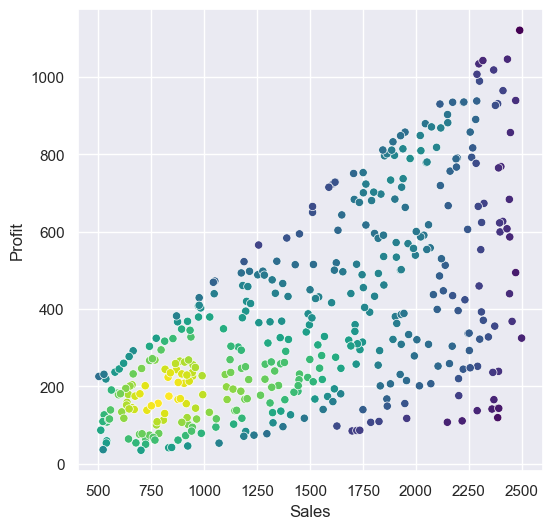

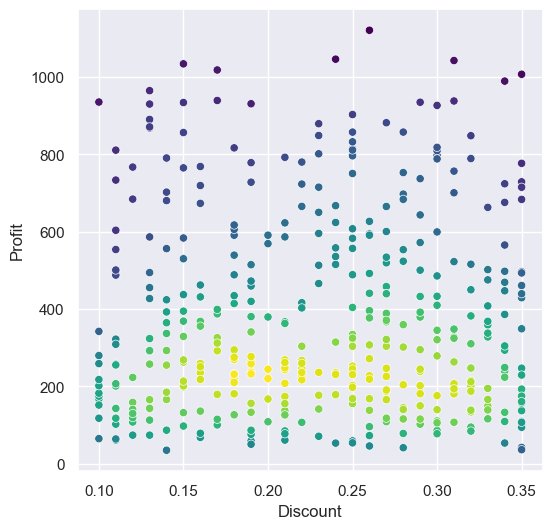

DATA FOR CITY  Nagercoil
############### PROFIT 


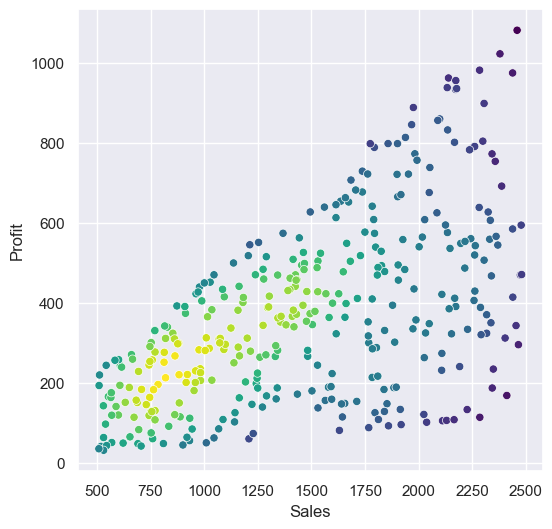

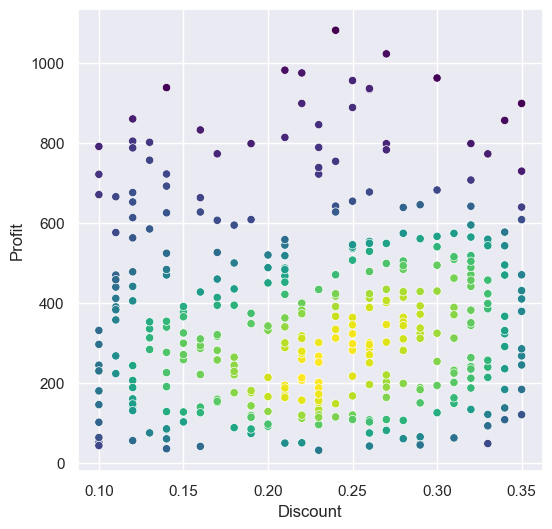

DATA FOR CITY  Pudukottai
############### PROFIT 


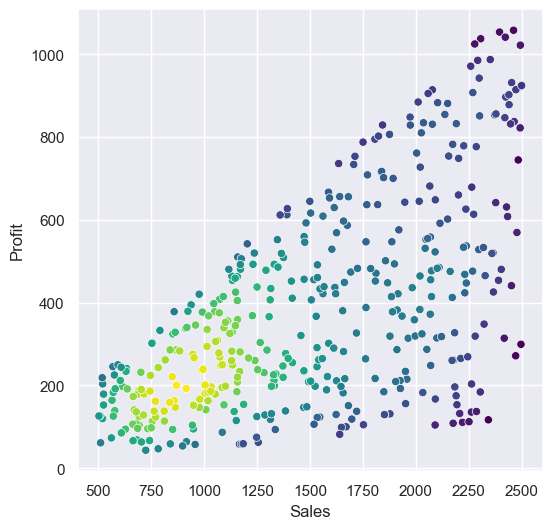

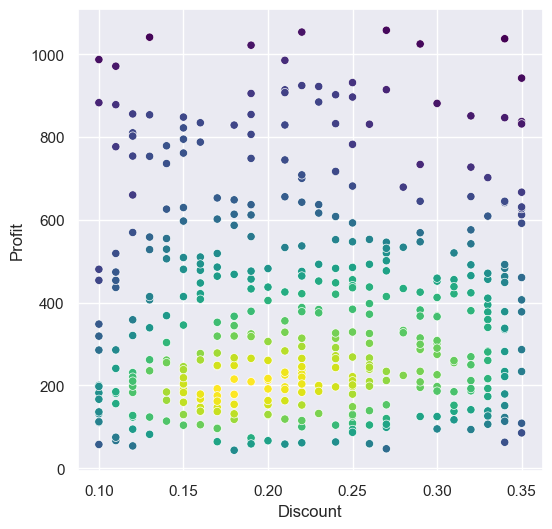

DATA FOR CITY  Theni
############### PROFIT 


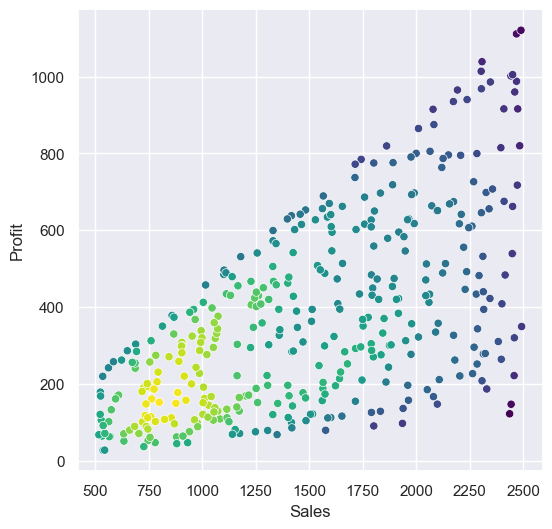

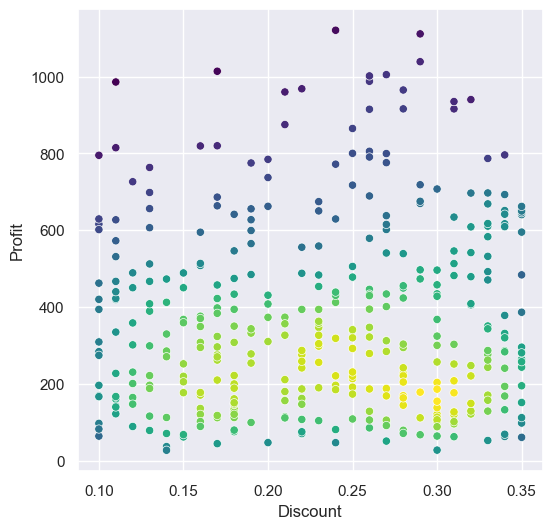

DATA FOR CITY  Coimbatore
############### PROFIT 


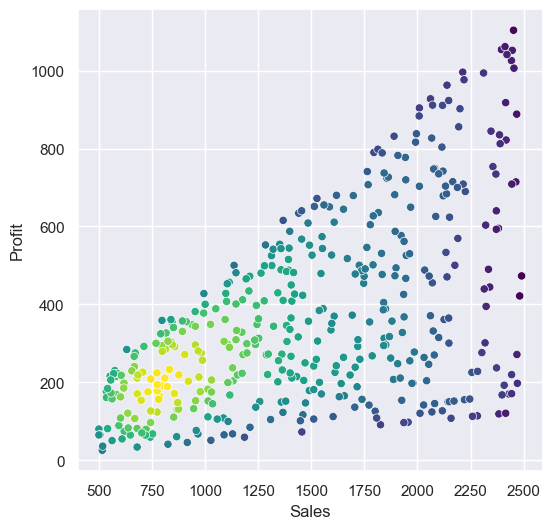

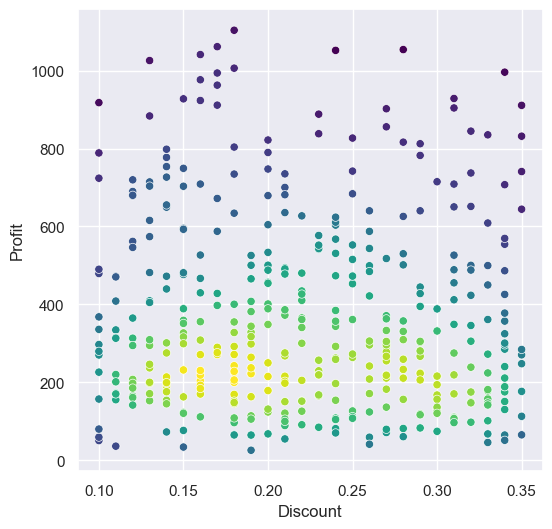

DATA FOR CITY  Virudhunagar
############### PROFIT 


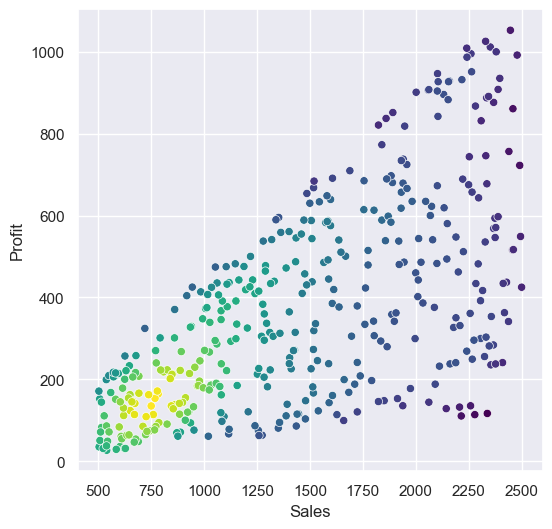

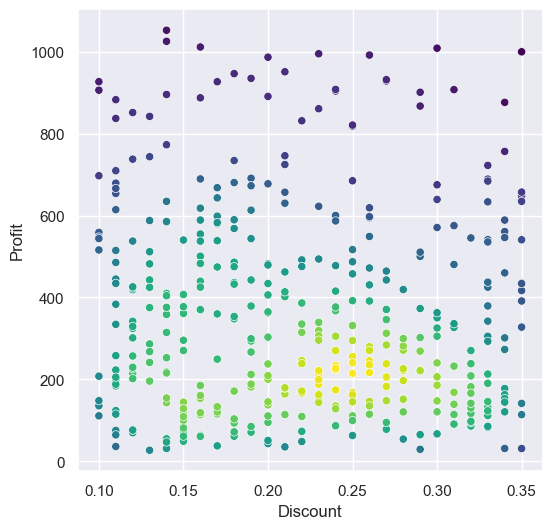

In [50]:
for city in data_frame['City'].unique():
    print("DATA FOR CITY ", city)

    city_data = data_frame[ data_frame['City'] == city]

    print("############### PROFIT ")
    sns.set_theme(rc={'figure.figsize':(5,5)})
    numeric_cols = city_data.select_dtypes(include='number').columns[:-1]

    for x_axis in numeric_cols:
        y_axis = 'Profit'

        values = np.vstack([city_data[x_axis], city_data[y_axis]])
        kernel = stats.gaussian_kde(values)(values)
        fig, ax = plt.subplots(figsize=(5, 5))
        sns.scatterplot(
            data=city_data,
            x=x_axis,
            y=y_axis,
            c=kernel,
            cmap="viridis",
            ax=ax,
        )
    plt.show()

In [ ]:
sns.set_theme(rc={'figure.figsize':(5,5)})
from scipy import stats

numeric_cols = data_frame.select_dtypes(include='number').columns[:-1]

for x_axis in numeric_cols:
    y_axis = 'Profit'

    values = np.vstack([data_frame[x_axis], data_frame[y_axis]])
    kernel = stats.gaussian_kde(values)(values)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.scatterplot(
        data=data_frame,
        x=x_axis,
        y=y_axis,
        c=kernel,
        cmap="viridis",
        ax=ax,
    )
plt.show()